***
# Business Analytics and Decision Making (BUSI 650) -- Final project 
### Professor: Shaya Sheikh
#### ***April 9th 2022***
### Project Title: ***House Sales in King County, USA***  
### Data Source:  [House Sales Prediction](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) 
##### Predict house price using
#### Team members:
- Harsh Patel - 1274482
- Ajay Patel - 1247699
- Niral Patel - 1303276
***
## This Business project contains:
1. Gether the Data from the Kaggle dataset
2. Data Selection, Make some necessary process on Datasets
3. Data cleaning, Pre processing
4. Data Preparation, Feature Engineering
5. Data Visualization
6. Data Analysis, Data Modelling 
7. Conclusion

### Python Vs. RapidMiner

- There are vast difference between both and also there are some limitation of those two.
- Rapid Miner will provide all the pre information of the data by using statistics of data and from that we know that which operation that need to perform befor applying model. Moreover, it bifurcate the culumns into bionomial, polinomial, interger, date, etc automatically. 
- Python in other way, we have to perform some code to check all information and we need to convert them individualy and check multiple times.
- In terms of visualization, Rapid Miner do not provide more visualization to understand the relation but in python we can compare multiple columns with eachother and get better visualization. Moreover, it provides the 3D, effective and different charts which make tasks easy to understand.  

### Because of these reasons we choose to perfome throung python as well as Rapid Miner in our project for self learning.

### Import necessary libraty to upload

In [2]:
from time import time
start = time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
## Regression libraries from Scikit learn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

import warnings
warnings.filterwarnings(action='ignore')

#Other additional imports
warnings.filterwarnings('ignore') 
plt.style.use(['seaborn-pastel'])
%matplotlib inline
%config InlineBackend.figure_format='retina'
%autosave 10
end=time()
print('Time to perfome code:',end-start)

Autosaving every 10 seconds
Time to perfome code: 3.0668857097625732


# 1. Gether the Data from the Kaggle dataset.
****
1. Download the Datasets 
2. Get the columns information which are mentioned below
3. Analyze and Visualize data with excel
    - data preparation
    - check missing valuse
    - basice relation information
    - colums modifications
    - basic data understanding
    - Markdown the important points on data
4. import data in the jupyter notebook
****

In [3]:
df = pd.read_csv("kc_house_data.csv")
df_check = df.copy()
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# 2. Data Selection, Make some necessary process on Datasets

In [4]:
print("This Dataset has", df.shape[1], "columns and", df.shape[0], "rows available.")

This Dataset has 21 columns and 21613 rows available.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data Information
****
-	id - Unique ID for each home sold
-	date - Date of the home sale
-	price - Price of each home sold
-	bedrooms - Number of bedrooms
-	bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
-	sqft_living - Square footage of the apartments interior living space
-	sqft_lot - Square footage of the land space
-	floors - Number of floors
-	waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
-	view - An index from 0 to 4 of how good the view of the property was
-	condition - An index from 1 to 5 on the condition of the apartment,
-	grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
-	sqft_above - The square footage of the interior housing space that is above ground level
-	sqft_basement - The square footage of the interior housing space that is below ground level
-	yr_built - The year the house was initially built
-	yr_renovated - The year of the house’s last renovation
-	zipcode - What zipcode area the house is in
-	lat – Lattitude
-	long – Longitude
-	sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
-	sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors
****

### 1. Drop the colums which are unnecessary!

After getting columns information, check the basic relationship between columns and remove then id necessary as below.

In [6]:
#the corelation of this columns is in nagative, which represent that there is no relation with price
colsToDrop = ['id','waterfront','date']
df.drop(colsToDrop, axis=1, inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

### 2. Check the zero and null values in the data frame

Data must be clear for better predictions result and for that we have to check and remove all the null values from the data frame. Moreover, we have to check the unique values in the data for for more data understanding and convret them as per model requirements.

In [7]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    if count != 0:
        print(column_name, ' is : ', count)

bedrooms  is :  13
bathrooms  is :  10
view  is :  19489
sqft_basement  is :  13126
yr_renovated  is :  20699


### 3. Check all the unique values in the particular column

In [8]:
print(df.apply(lambda x: pd.unique(x).tolist()))

price            [221900.0, 538000.0, 180000.0, 604000.0, 51000...
bedrooms                [3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]
bathrooms        [1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7...
sqft_living      [1180, 2570, 770, 1960, 1680, 5420, 1715, 1060...
sqft_lot         [5650, 7242, 10000, 5000, 8080, 101930, 6819, ...
floors                              [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]
view                                               [0, 3, 4, 2, 1]
condition                                          [3, 5, 4, 1, 2]
grade                     [7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]
sqft_above       [1180, 2170, 770, 1050, 1680, 3890, 1715, 1060...
sqft_basement    [0, 400, 910, 1530, 730, 1700, 300, 970, 760, ...
yr_built         [1955, 1951, 1933, 1965, 1987, 2001, 1995, 196...
yr_renovated     [0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, ...
zipcode          [98178, 98125, 98028, 98136, 98074, 98053, 980...
lat              [47.5112, 47.721, 47.7379, 47.5208, 47.6168, 

### 4. Check the all columns values and their information 

number of values, mean value, standard devation, minimum and maximum value, (first, second and third) quartile which will help us to understand the outliers, data final valuse.

In [9]:
 df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.234303      3.409430      7.656873   1788.390691   
std        0.539989      0.766318      0.650743      1.175459    828.090978   
min        1.000000      0.000000      1.000000      1.000000    290.000000   
25%        1.000000      0.000000      3.000000      7.000000   1190.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2210.000000   
max        3.500000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean      291.509045   1971.005136     84.402258  98077.939805     47.560053   
std       442.575043     29.373411    401.679240     53.505026      0.138564   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.471000   
50%         0.000000   1975.000000      0.000000  98065.000000     47.571800   
75%       560.000000   1997.000000      0.000000  98118.000000     47.678000   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21613.000000   21613.000000   21613.000000  
mean    -122.213896    1986.552492   12768.455652  
std        0.140828     685.391304   27304.179631  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

# 3. Data cleaning, Pre processing

### 1. replace the mean value of bedroom and bathroom with null values 
from the earlier code we found that bathroom and badroom have some null values that need to change that with the mean values of the column data.

In [10]:
mean_bedrooms=df['bedrooms'].mean()
mean_bathrooms=df['bathrooms'].mean()


df['bedrooms'].replace(np.nan,mean_bedrooms, inplace=True)
df['bathrooms'].replace(np.nan,mean_bathrooms, inplace=True)

### 2. Convert and Distribute the date (datatype is object) column with year, month, day and then delete the data column

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

### Now this data is perfect, we can work on it for feature engineering and visualization

# 4. Data Preparation, Feature Engineering

#### Feature Engineering is a task in which form the basic understanding of columns create new column that have extra information. Moreover, Feature Engineering will help us for more data visualization and prediction.
- Add the column age of the house that can find out by substracting the current year with build year and renovated year. 
- Create total area which is covered by the house by adding different sqft columns in one column.
- After this we can visualize the more accurate way as shown below about house age.

In [12]:
df_check['age'] = [2022 - x[0] if x[1]==0 else 2022 - x[1] for x in df_check[['yr_built','yr_renovated']].values]

# Display the result
df_check[['yr_built','yr_renovated','age']].head()

yr_built  yr_renovated  age
0      1955             0   67
1      1951          1991   31
2      1933             0   89
3      1965             0   57
4      1987             0   35

### Same as above but in this we calculate the total area and the basement columns for more predictions

Text(0.5, 0, 'House Age')

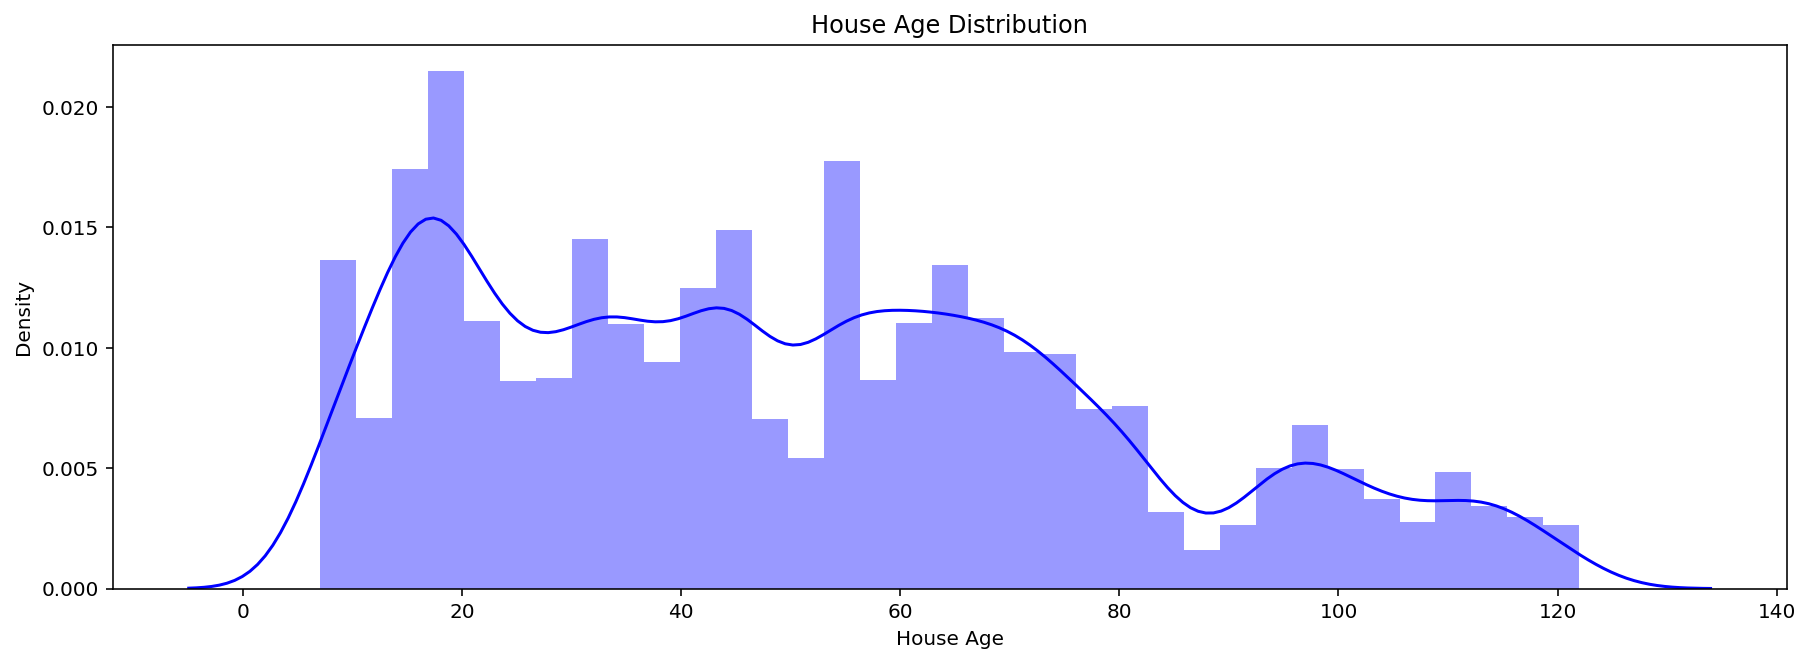

In [13]:
# Adding new features
df["Home_Age"] = 2022 - df["yr_built"]
df['is_renovated'] = df["yr_renovated"].where(df["yr_renovated"] == 0, 1)
df['Total_Area'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement'] 
df['Basement'] = df['sqft_basement'].where(df["sqft_basement"] == 0, 1)


# House Age Distribution 
plt.figure(figsize=(15,5))
sns.distplot(df["Home_Age"], color="blue")
plt.title("House Age Distribution")
plt.ylabel("Density")
plt.xlabel("House Age")

#### Century old houses. Hope these houses are still in living condtion. Although distribution is very skewed.

### Remove the outliers in the price which are unnacessary
- Outlier is the data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. 
- An outlier is an observation that lies an abnormal distance from other values in a random sample from a population
- Outlier create significant impact on outcome of prediction and also affect on visualization because of that we must have to remove it and there are number of ways to remove it and we perform code below.

<AxesSubplot:xlabel='price'>

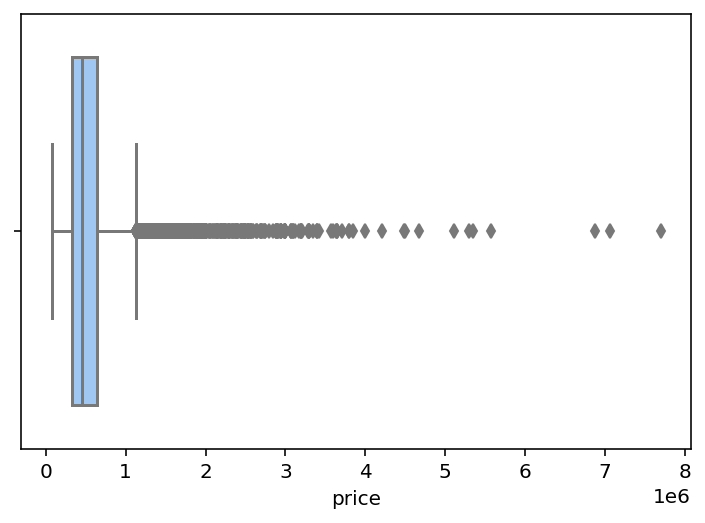

In [14]:
sns.boxplot(df['price'],data=df)

- A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are.

In [15]:
def outlier(df):
    for x in df.columns:        
        Q1=df[x].quantile(0.25)
        Q3=df[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        df.loc[:,x]= np.where(df[x].values > Upper, Upper-1, df[x].values)
        df.loc[:,x]= np.where(df[x].values < Lower, Lower+1, df[x].values)

outlier(df)

price


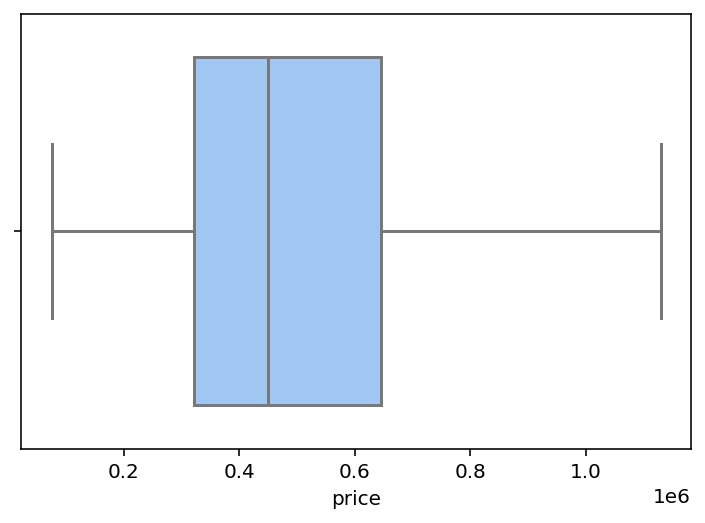

bedrooms


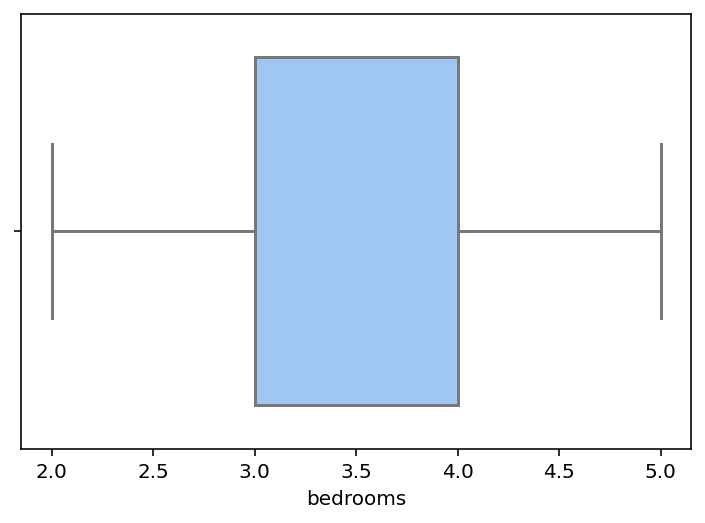

bathrooms


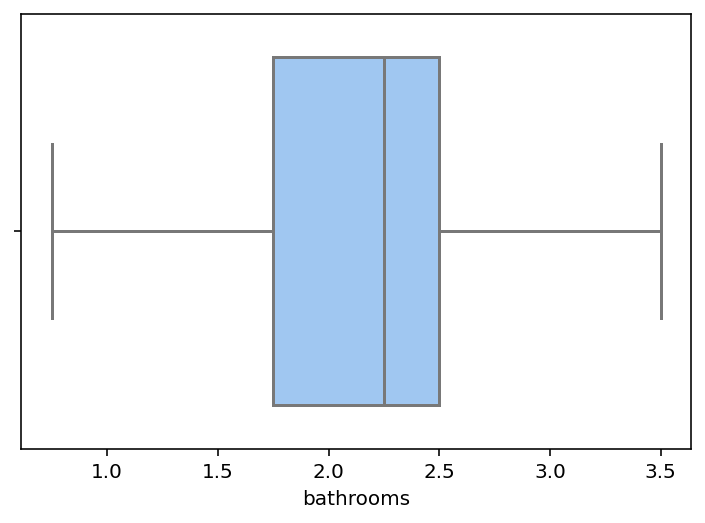

sqft_living


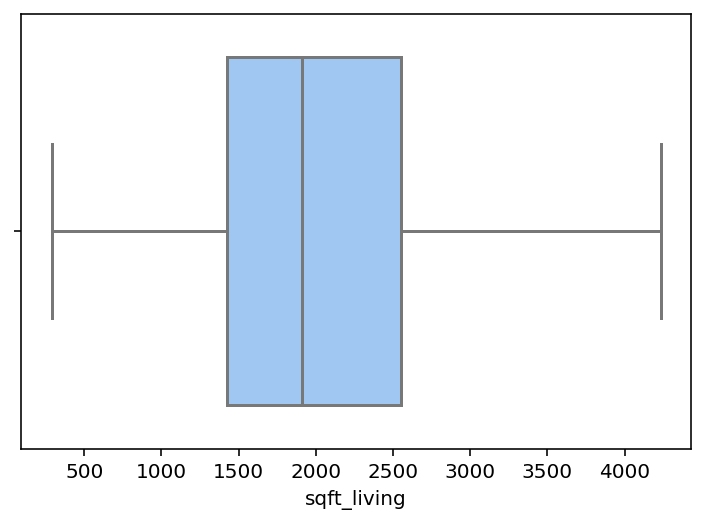

sqft_lot


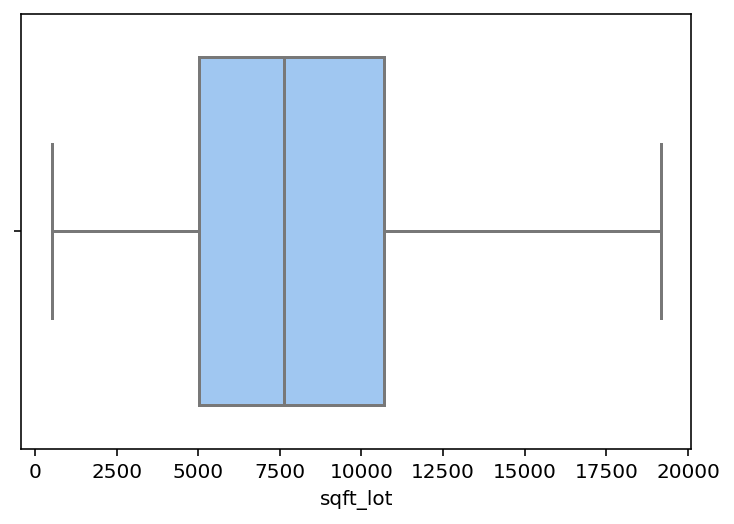

floors


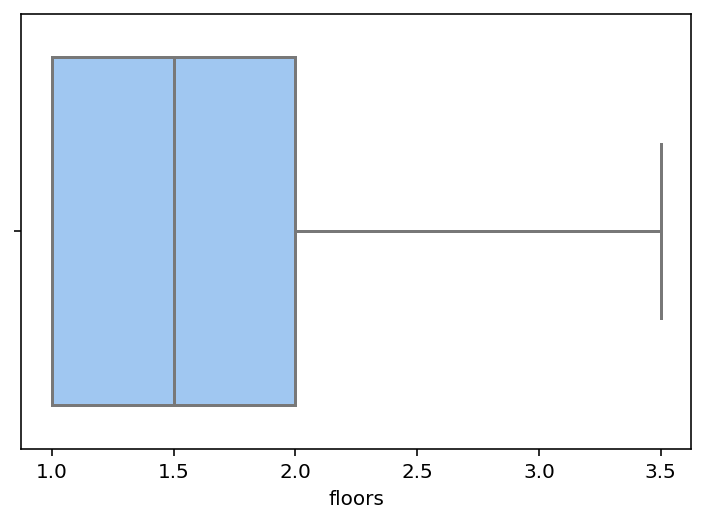

view


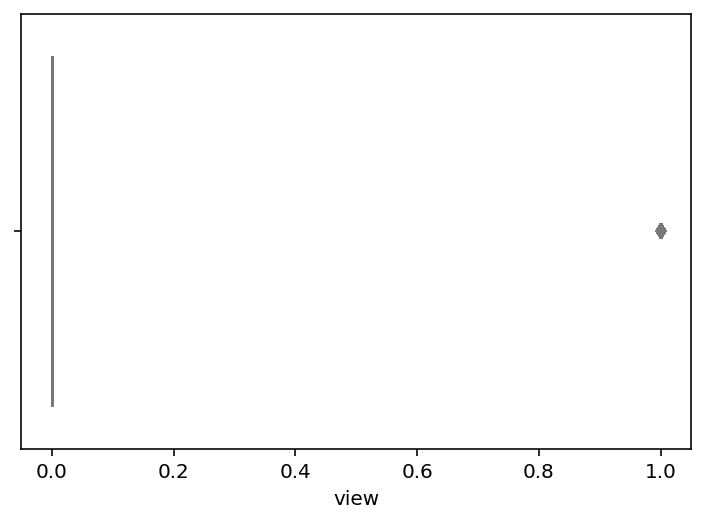

condition


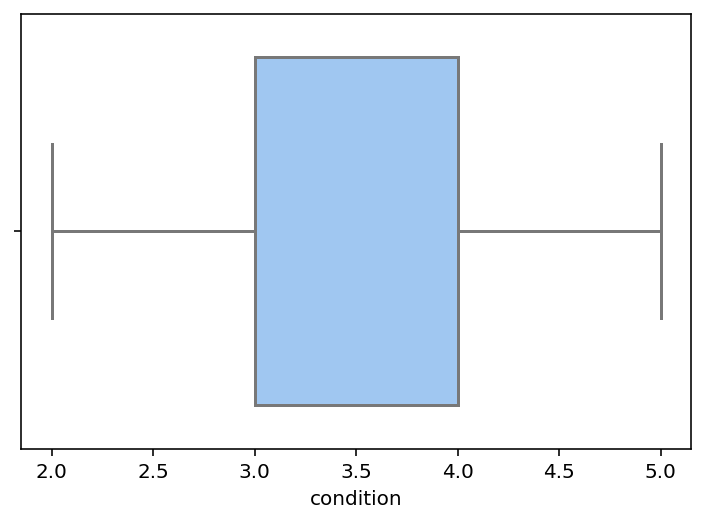

grade


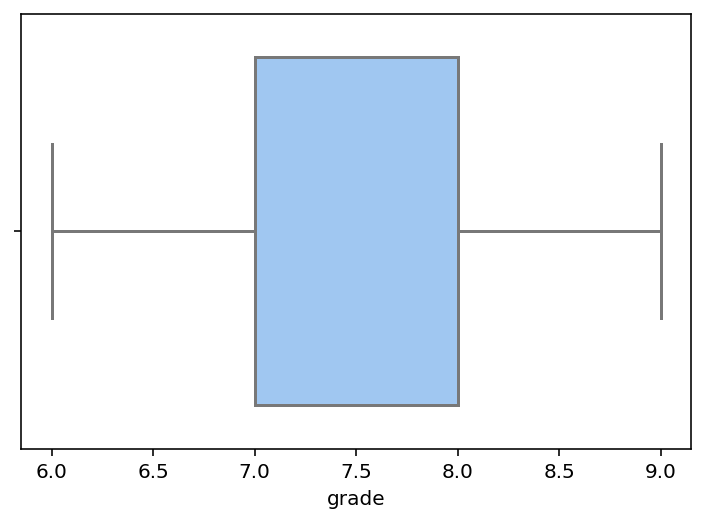

sqft_above


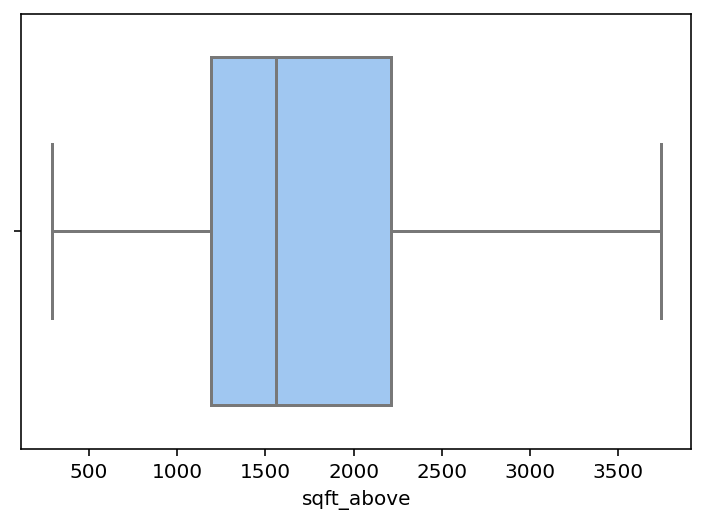

sqft_basement


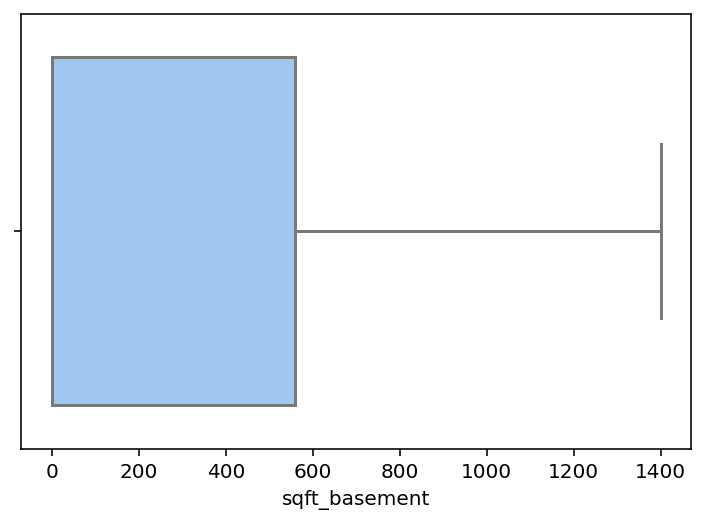

yr_built


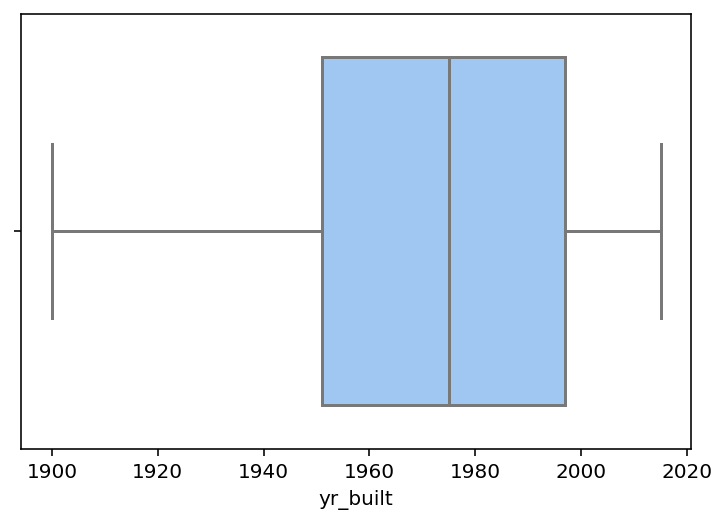

yr_renovated


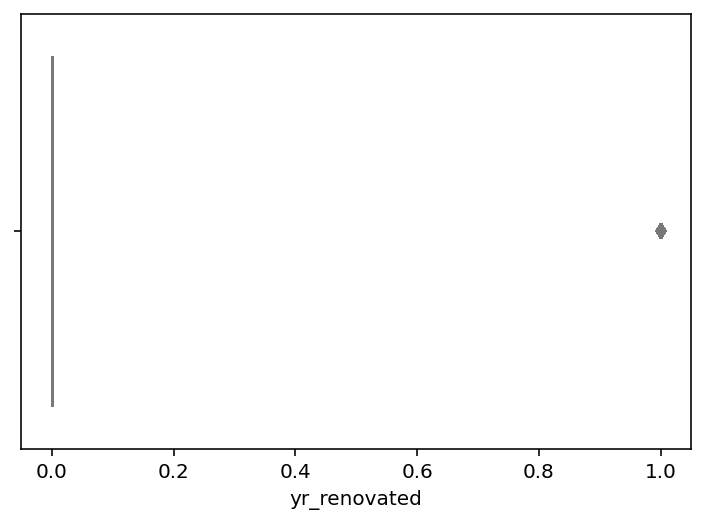

zipcode


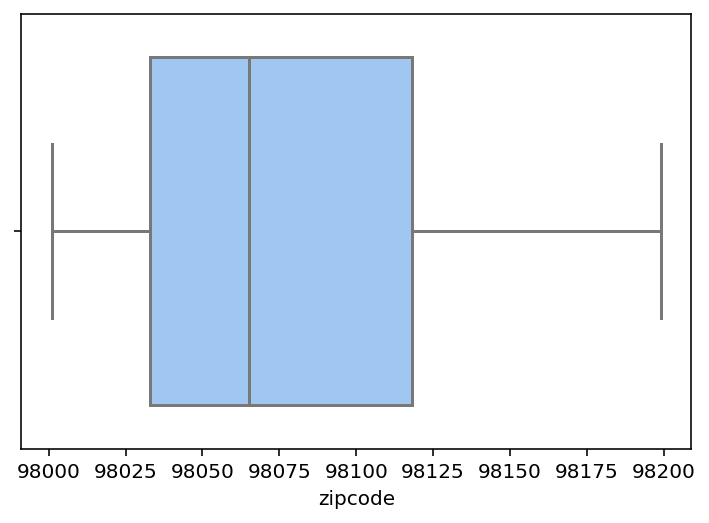

lat


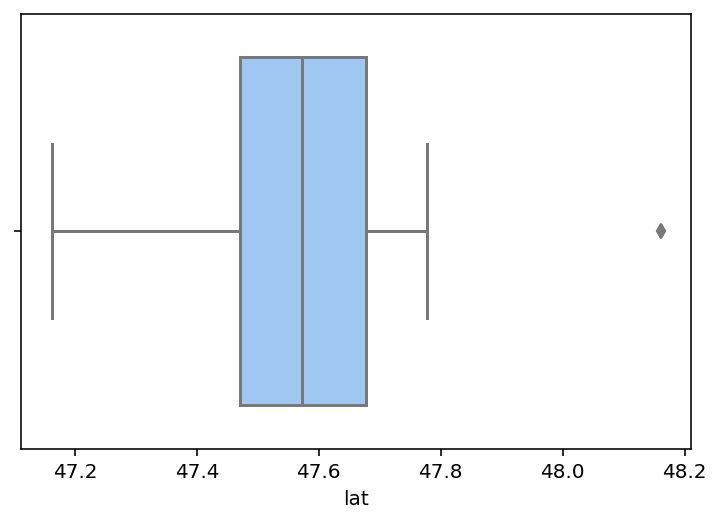

long


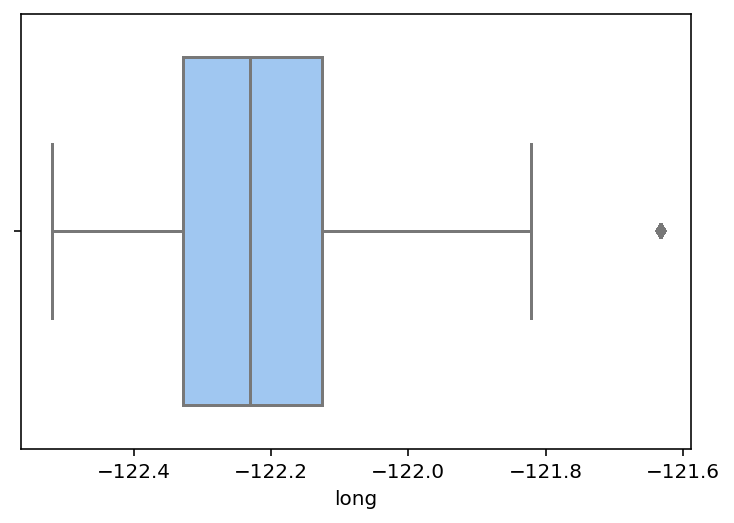

sqft_living15


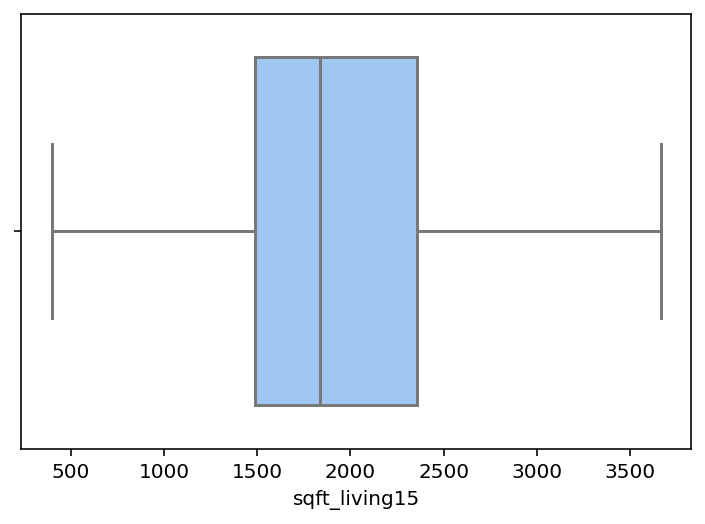

sqft_lot15


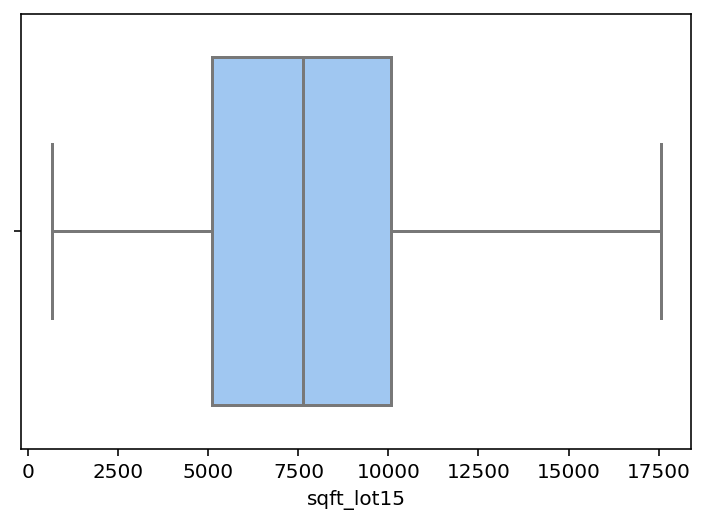

Home_Age


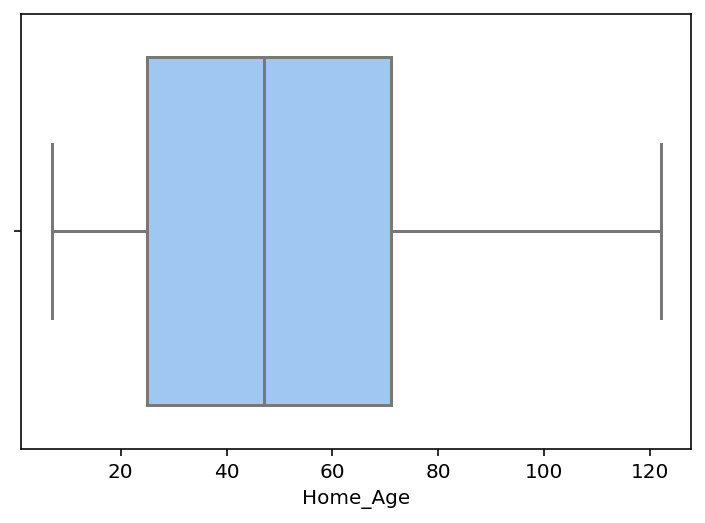

is_renovated


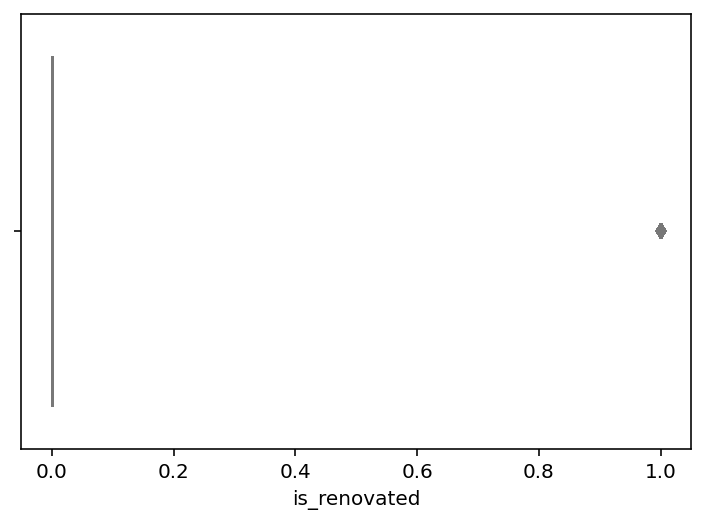

Total_Area


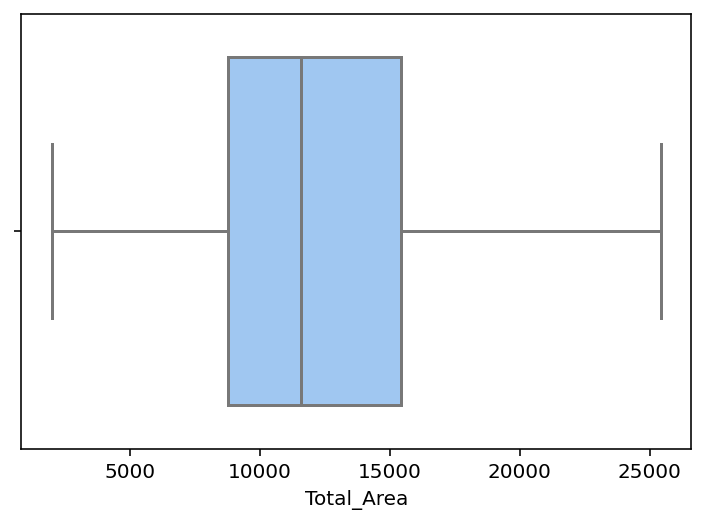

Basement


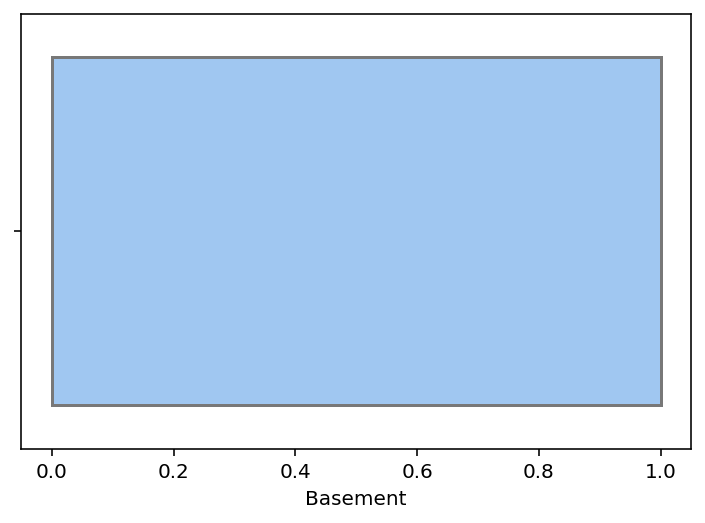

In [16]:
for i in df.columns:
    sns.boxplot(df[i],data=df)
    print(i)
    plt.show()

- After Removing the outlier check the details of the data

In [17]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   5.115872e+05      3.357146      2.073353   2058.052098   8705.112247   
std    2.500025e+05      0.807542      0.683021    839.239187   5046.249620   
min    7.500000e+04      2.000000      0.750000    290.000000    520.000000   
25%    3.219500e+05      3.000000      1.750000   1427.000000   5040.000000   
50%    4.500000e+05      3.000000      2.250000   1910.000000   7618.000000   
75%    6.450000e+05      4.000000      2.500000   2550.000000  10688.000000   
max    1.129574e+06      5.000000      3.500000   4233.500000  19159.000000   

             floors          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.098274      3.411512      7.535627   1769.534771   
std        0.539989      0.297692      0.645408      0.863512    763.956426   
min        1.000000      0.000000      2.000000      6.000000    290.000000   
25%        1.000000      0.000000      3.000000      7.000000   1190.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2210.000000   
max        3.500000      1.000000      5.000000      9.000000   3740.000000   

       ...  yr_renovated       zipcode           lat          long  \
count  ...  21613.000000  21613.000000  21613.000000  21613.000000   
mean   ...      0.042289  98077.939805     47.560145   -122.212681   
std    ...      0.201253     53.505026      0.138630      0.144902   
min    ...      0.000000  98001.000000     47.162200   -122.519000   
25%    ...      0.000000  98033.000000     47.471100   -122.328000   
50%    ...      0.000000  98065.000000     47.571800   -122.230000   
75%    ...      0.000000  98118.000000     47.678000   -122.125000   
max    ...      1.000000  98199.000000     48.160500   -121.632500   

       sqft_living15    sqft_lot15      Home_Age  is_renovated    Total_Area  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean     1975.087679   8298.051404     50.994864      0.042289  12926.598135   
std       648.933582   4363.263793     29.373411      0.201253   6017.221534   
min       399.000000    651.000000      7.000000      0.000000   2013.000000   
25%      1490.000000   5100.000000     25.000000      0.000000   8800.000000   
50%      1840.000000   7620.000000     47.000000      0.000000  11581.000000   
75%      2360.000000  10083.000000     71.000000      0.000000  15449.000000   
max      3664.000000  17556.500000    122.000000      1.000000  25421.500000   

           Basement  
count  21613.000000  
mean       0.392680  
std        0.488358  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 22 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  float64
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  float64
 4   sqft_lot       21613 non-null  float64
 5   floors         21613 non-null  float64
 6   view           21613 non-null  float64
 7   condition      21613 non-null  float64
 8   grade          21613 non-null  float64
 9   sqft_above     21613 non-null  float64
 10  sqft_basement  21613 non-null  float64
 11  yr_built       21613 non-null  float64
 12  yr_renovated   21613 non-null  float64
 13  zipcode        21613 non-null  float64
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  float64
 17  sqft_lot15     21613 non-null  float64
 18  Home_A

### Data Visualization
- it is the portrayal of information through utilization of normal designs, like outlines, plots, infographics, and even activitys. 
- These visual showcases of data convey complex information connections and information driven experiences in a manner that is straightforward.
- Data visualization can be used for an assortment of purposes, and it's vital to take note of that isn't just held for use by information groups. The executives likewise use it to convey hierarchical design and order while information investigators and information researchers use it to find and make sense of examples and patterns.
- it is usually used to spike thought age across groups. They are regularly utilized during conceptualizing or Design Thinking meetings toward the beginning of a task by supporting the assortment of alternate points of view and featuring the normal worries of the system.
- below are the all the graphs related to the prices which are explained as below.

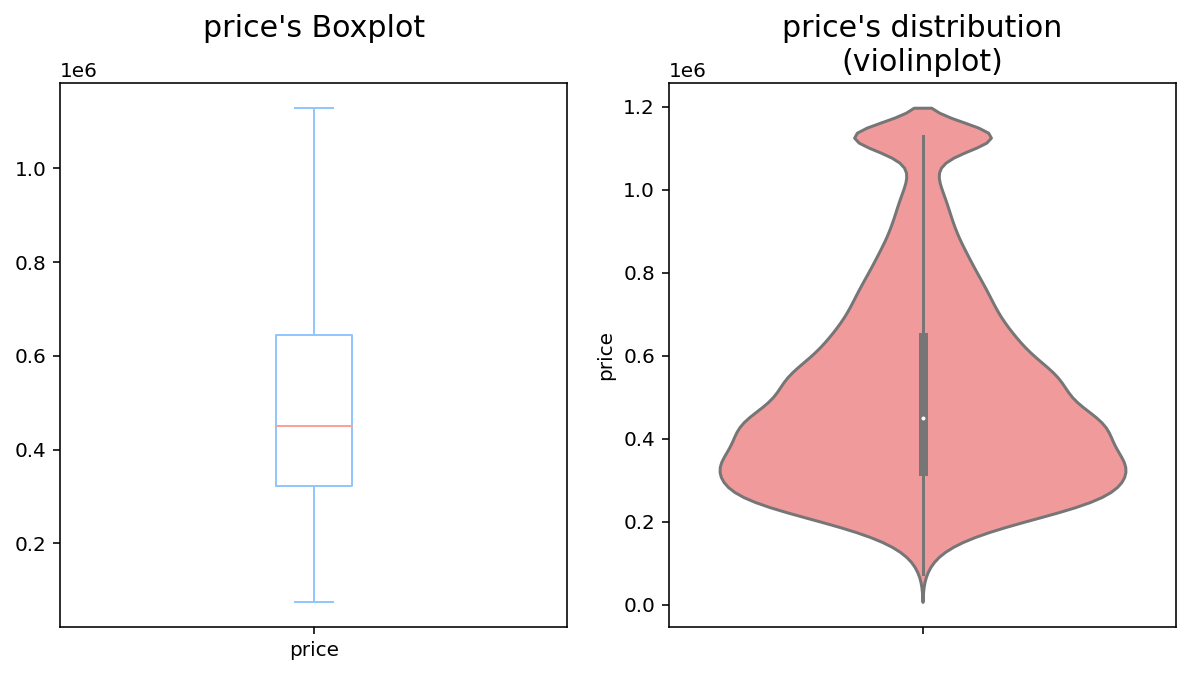

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df['price'].plot.box(ax = axes[0])
axes[0].set_title('price\'s Boxplot\n', fontsize = 15)

sns.violinplot(ax = axes[1], y = 'price', data = df, color = '#ff8c8e')
axes[1].set_title('price\'s distribution\n(violinplot)', fontsize = 15)

plt.show()

<Figure size 864x576 with 0 Axes>

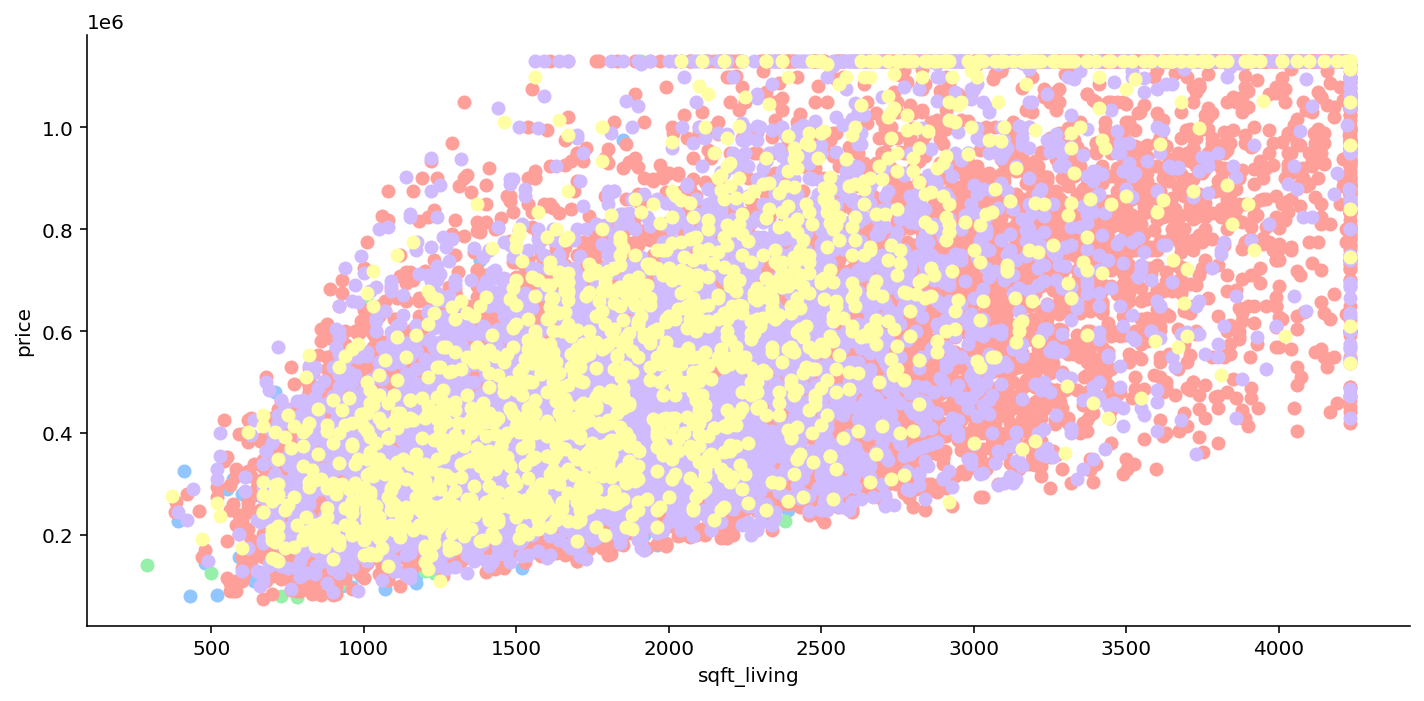

In [20]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=df, hue='condition',size= 5, aspect=2)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

- FacetGrid() : FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.
- This this graph we compare price, Total area and condition and we got basic understanding that if total area increase and condition is good than prices will increase 

<Figure size 864x576 with 0 Axes>

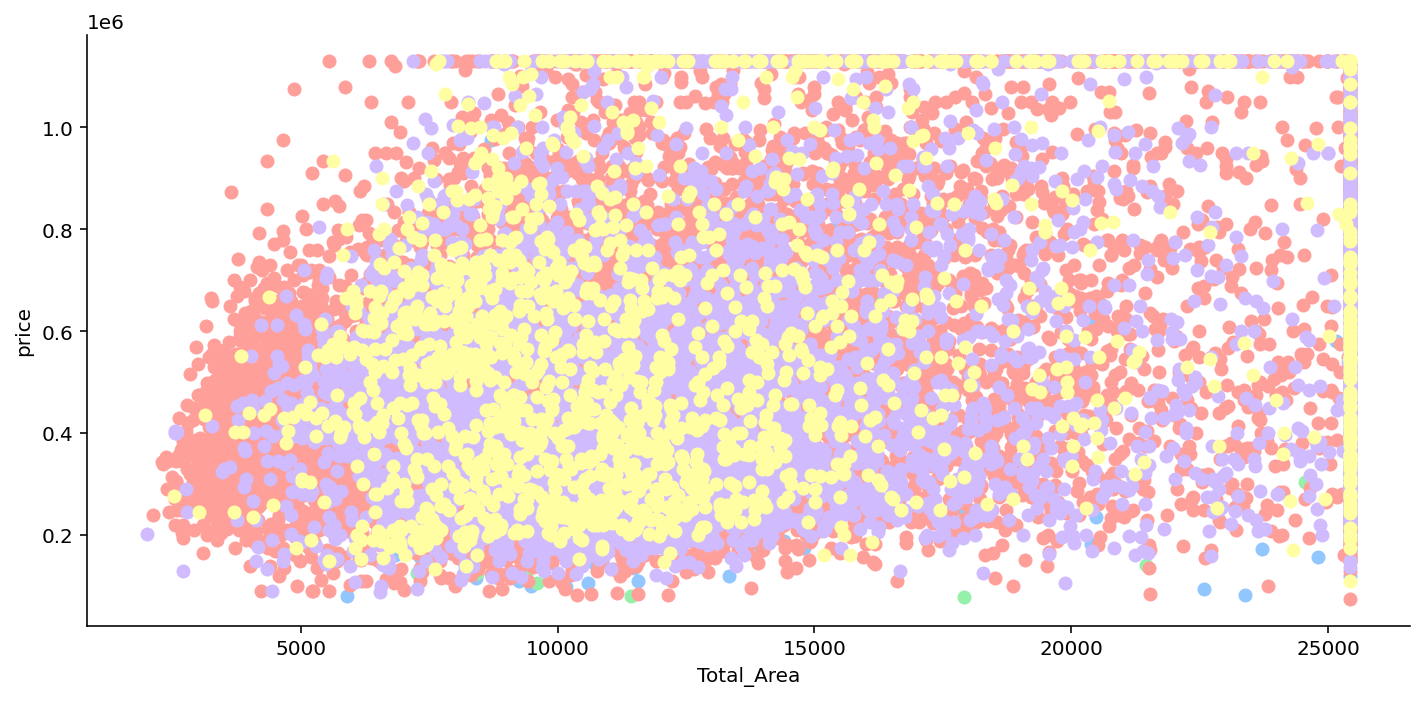

In [21]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=df, hue='condition',size= 5, aspect=2)
g.map(plt.scatter, "Total_Area", "price")
plt.show()

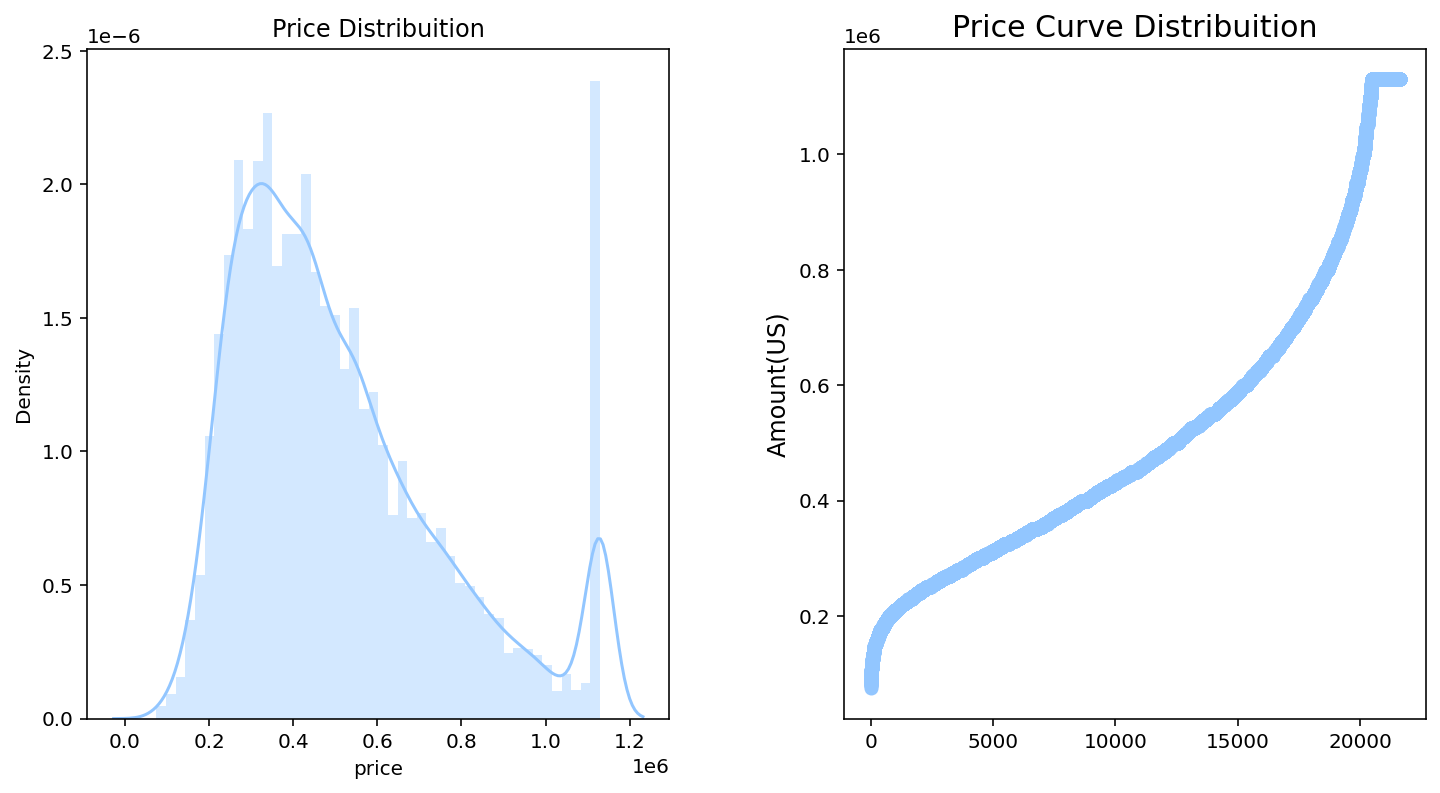

In [22]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Price Distribuition')
sns.distplot(df['price'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

<Figure size 576x360 with 0 Axes>

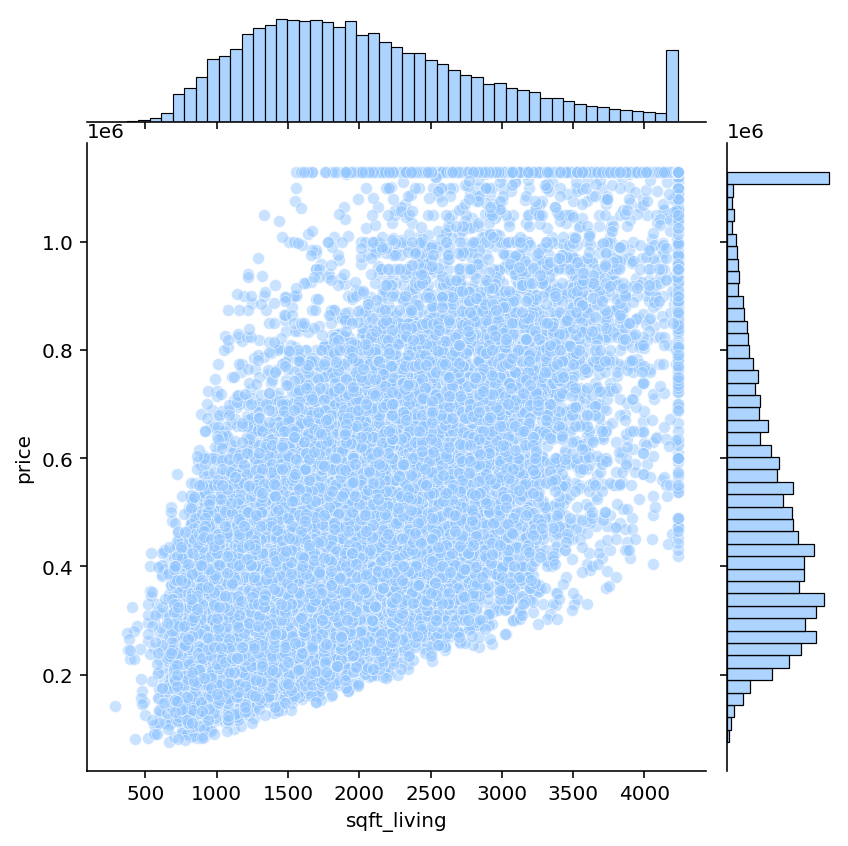

In [23]:
plt.figure(figsize = (8, 5))
sns.jointplot(df.sqft_living, df.price, 
              alpha = 0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

<AxesSubplot:xlabel='Total_Area', ylabel='price'>

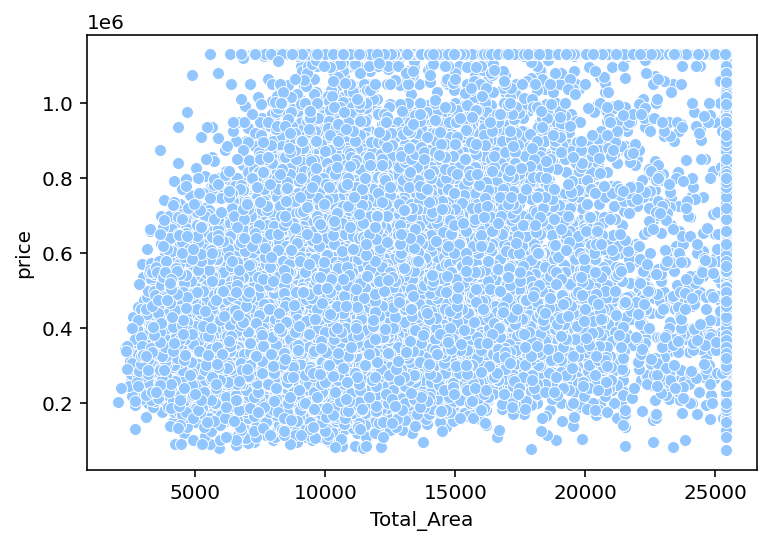

In [24]:
sns.scatterplot(x = 'Total_Area', y = 'price', data = df)

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

- in this bar graph we get information about 'bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'is_renovated', 'condition' unique values and their counts.

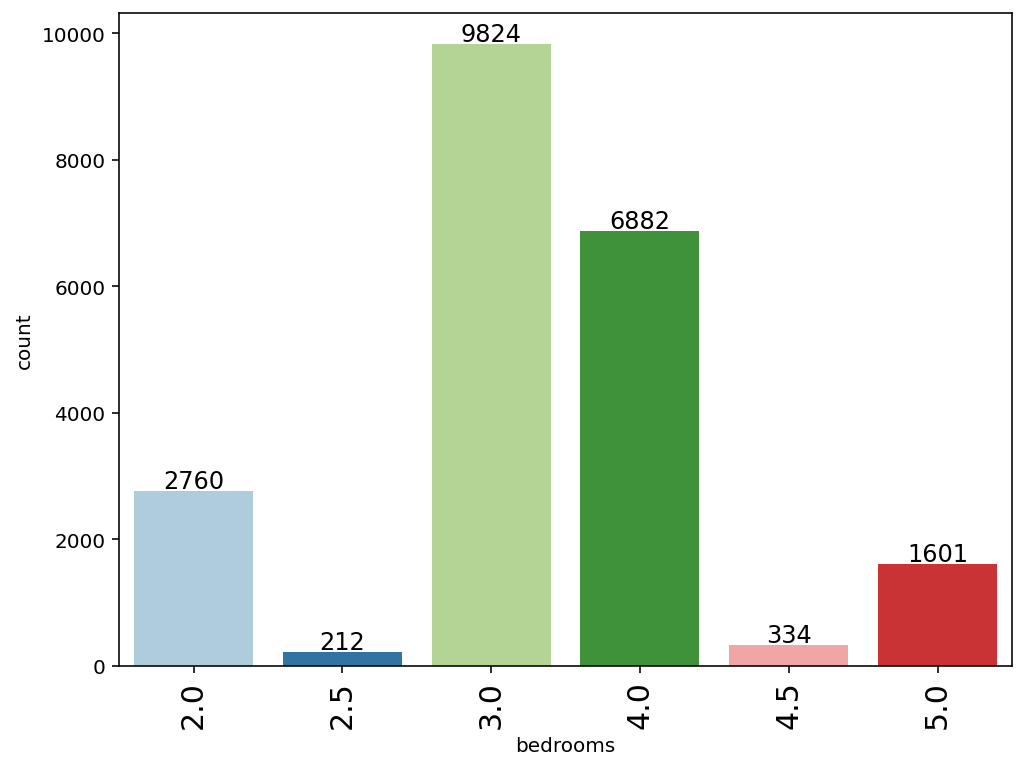

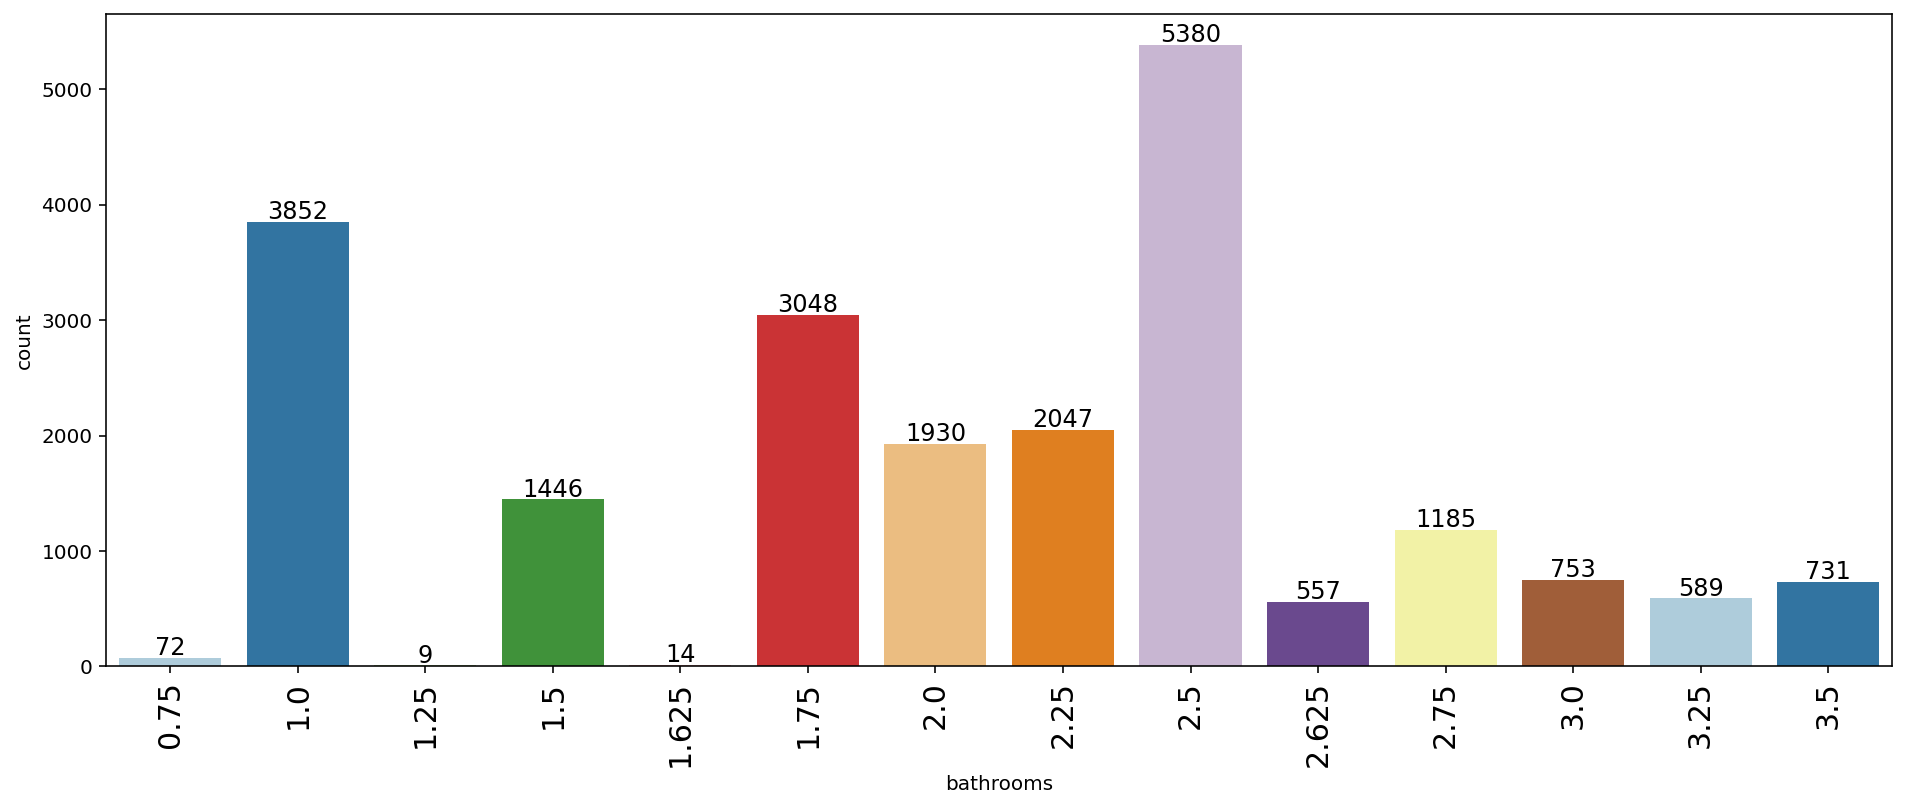

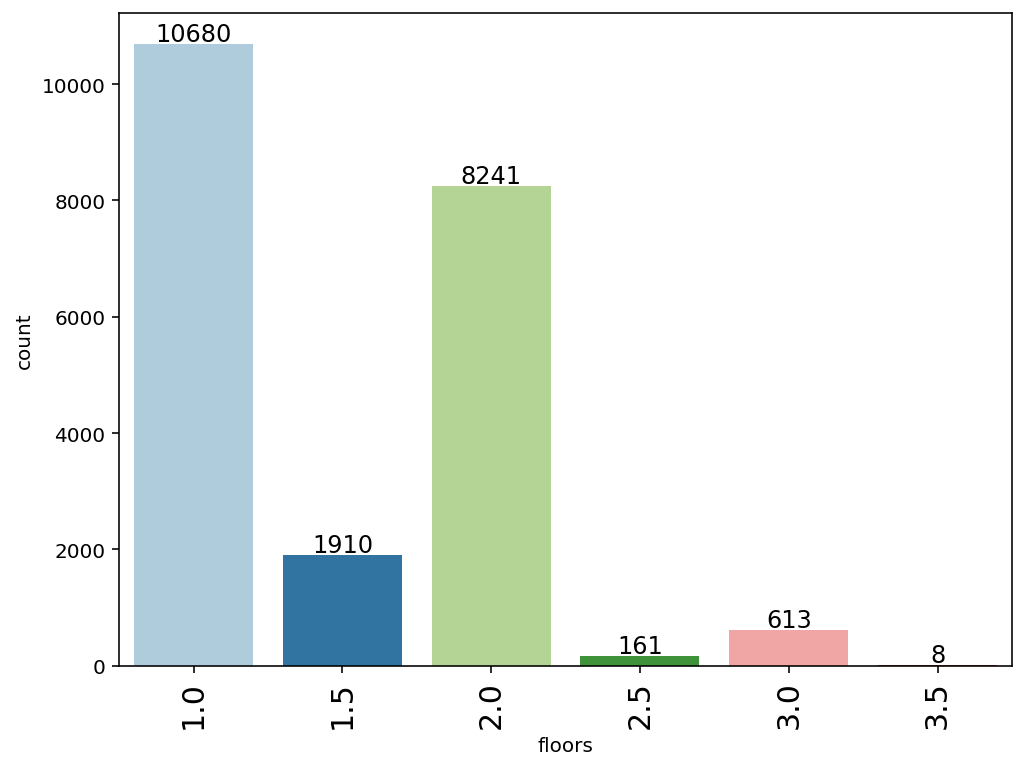

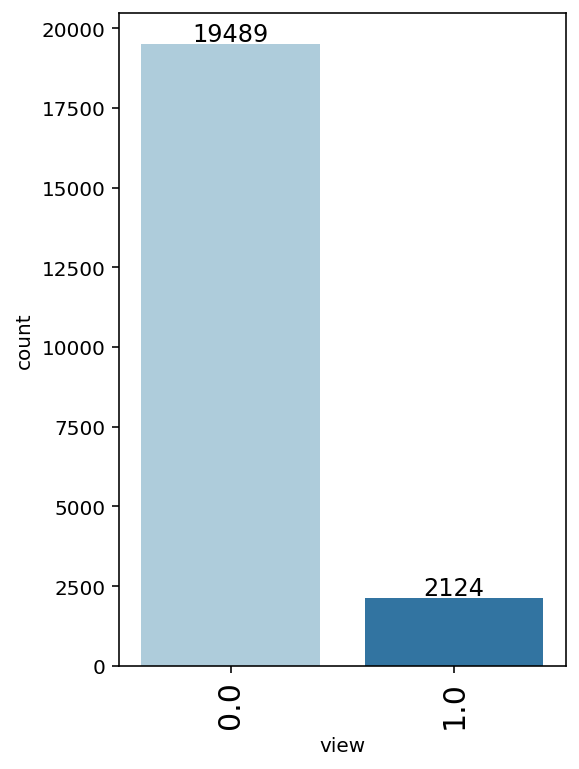

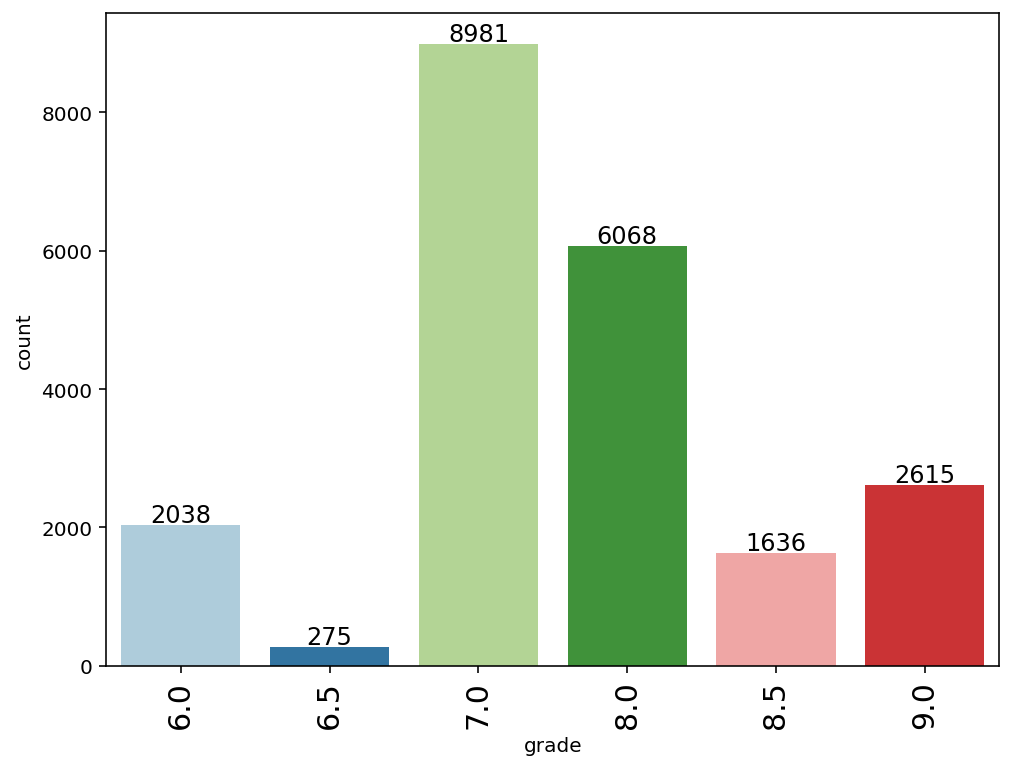

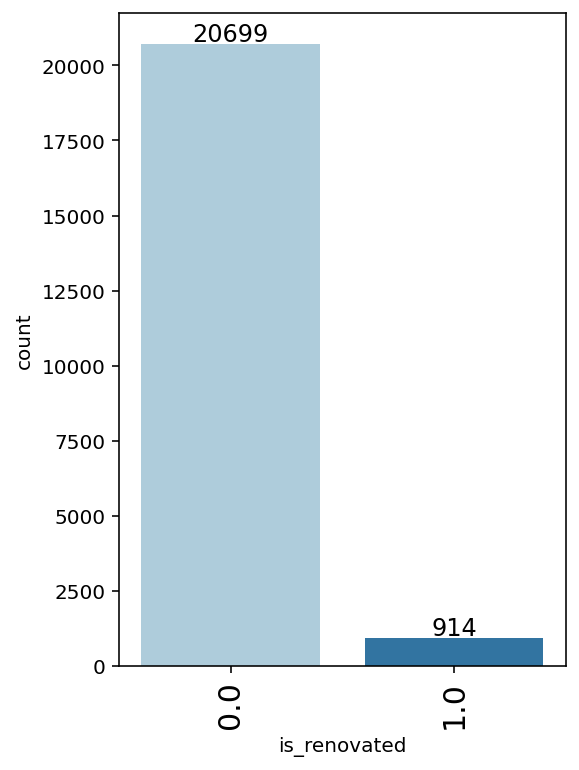

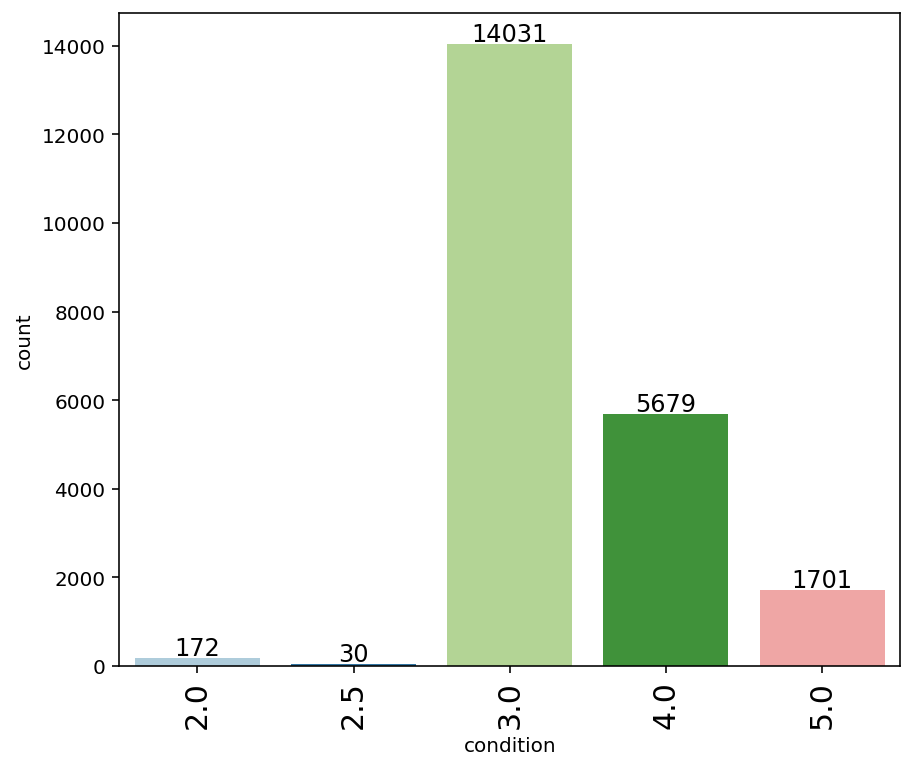

In [26]:
column = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'is_renovated', 'condition']
for col in column:
    labeled_barplot(df, col)

In [ ]:
df.info()

(0.0, 1182302.7)

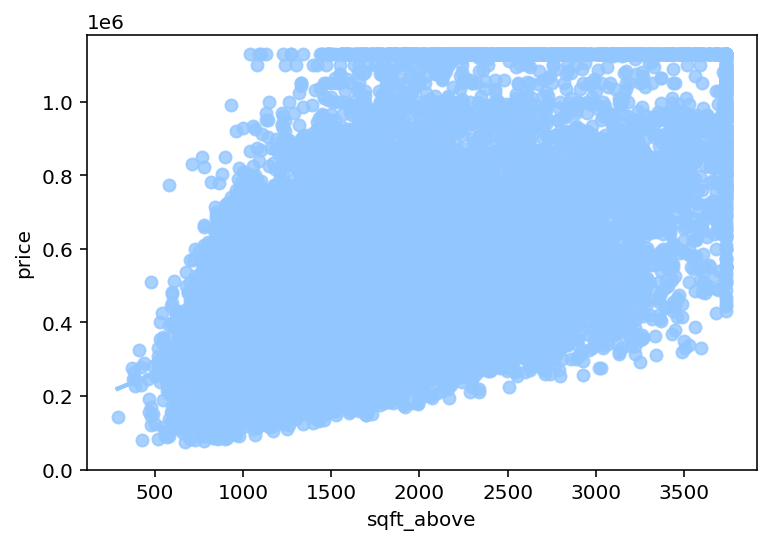

In [27]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='price', ylabel='sqft_living15'>

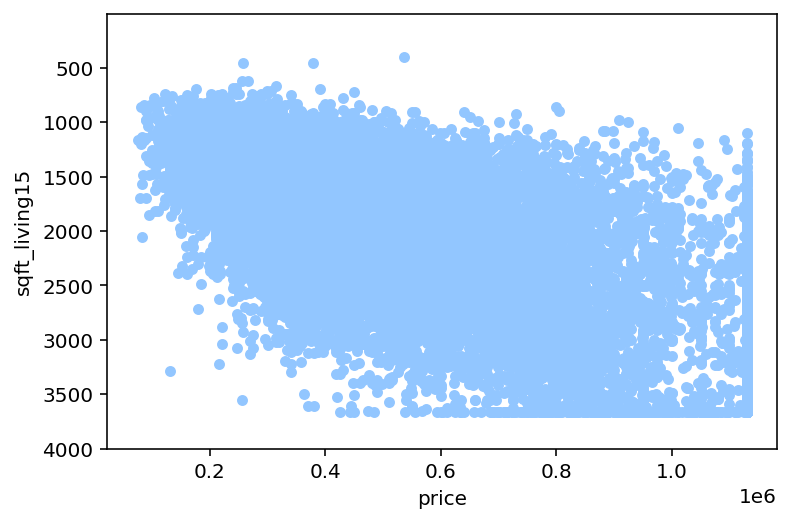

In [52]:
var = 'sqft_living15'
df_info = pd.concat([df['price'], df[var]], axis=1)
df_info.plot.scatter(x='price', y=var, ylim=(4000,4))

### Check the correlation between the price and other columns whcih helps for more accurate prediction by removing the negative correlated columns

- correlation is in between the range of -1 to 1 and in this -1 represent negative correlation (not related each other) and 1 is represented highly related to each other.

In [29]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701144
sqft_living15    0.626365
grade            0.622545
sqft_above       0.602468
bathrooms        0.487286
lat              0.402384
bedrooms         0.349574
view             0.342361
Total_Area       0.323856
floors           0.298728
sqft_basement    0.294211
Basement         0.196165
sqft_lot         0.172297
sqft_lot15       0.167141
yr_renovated     0.121642
is_renovated     0.121642
yr_built         0.064247
long             0.042211
condition        0.039601
zipcode         -0.043023
Home_Age        -0.064247
Name: price, dtype: float64

- Here again we delete more columns which are not positivily correlated with the price

In [31]:
colsToDrop = ['Basement','zipcode','Home_Age', 'yr_renovated', 'condition', 'sqft_lot', 'sqft_lot15','yr_built', 'is_renovated']
df.drop(colsToDrop, axis=1, inplace=True)

- A heatmap is a plot of rectangular information as a variety of encoded frameworks. As a boundary, it takes a 2D dataset. That dataset can be constrained into a ndarray. This is an extraordinary method for envisioning information since it can show the connection between variables including time
- this heatmap represent that bathroomm sqft_living, grade, sqft_above, sqft_living15 and, bedroom create impact on the price. Because of this we can apply models based on those columns.

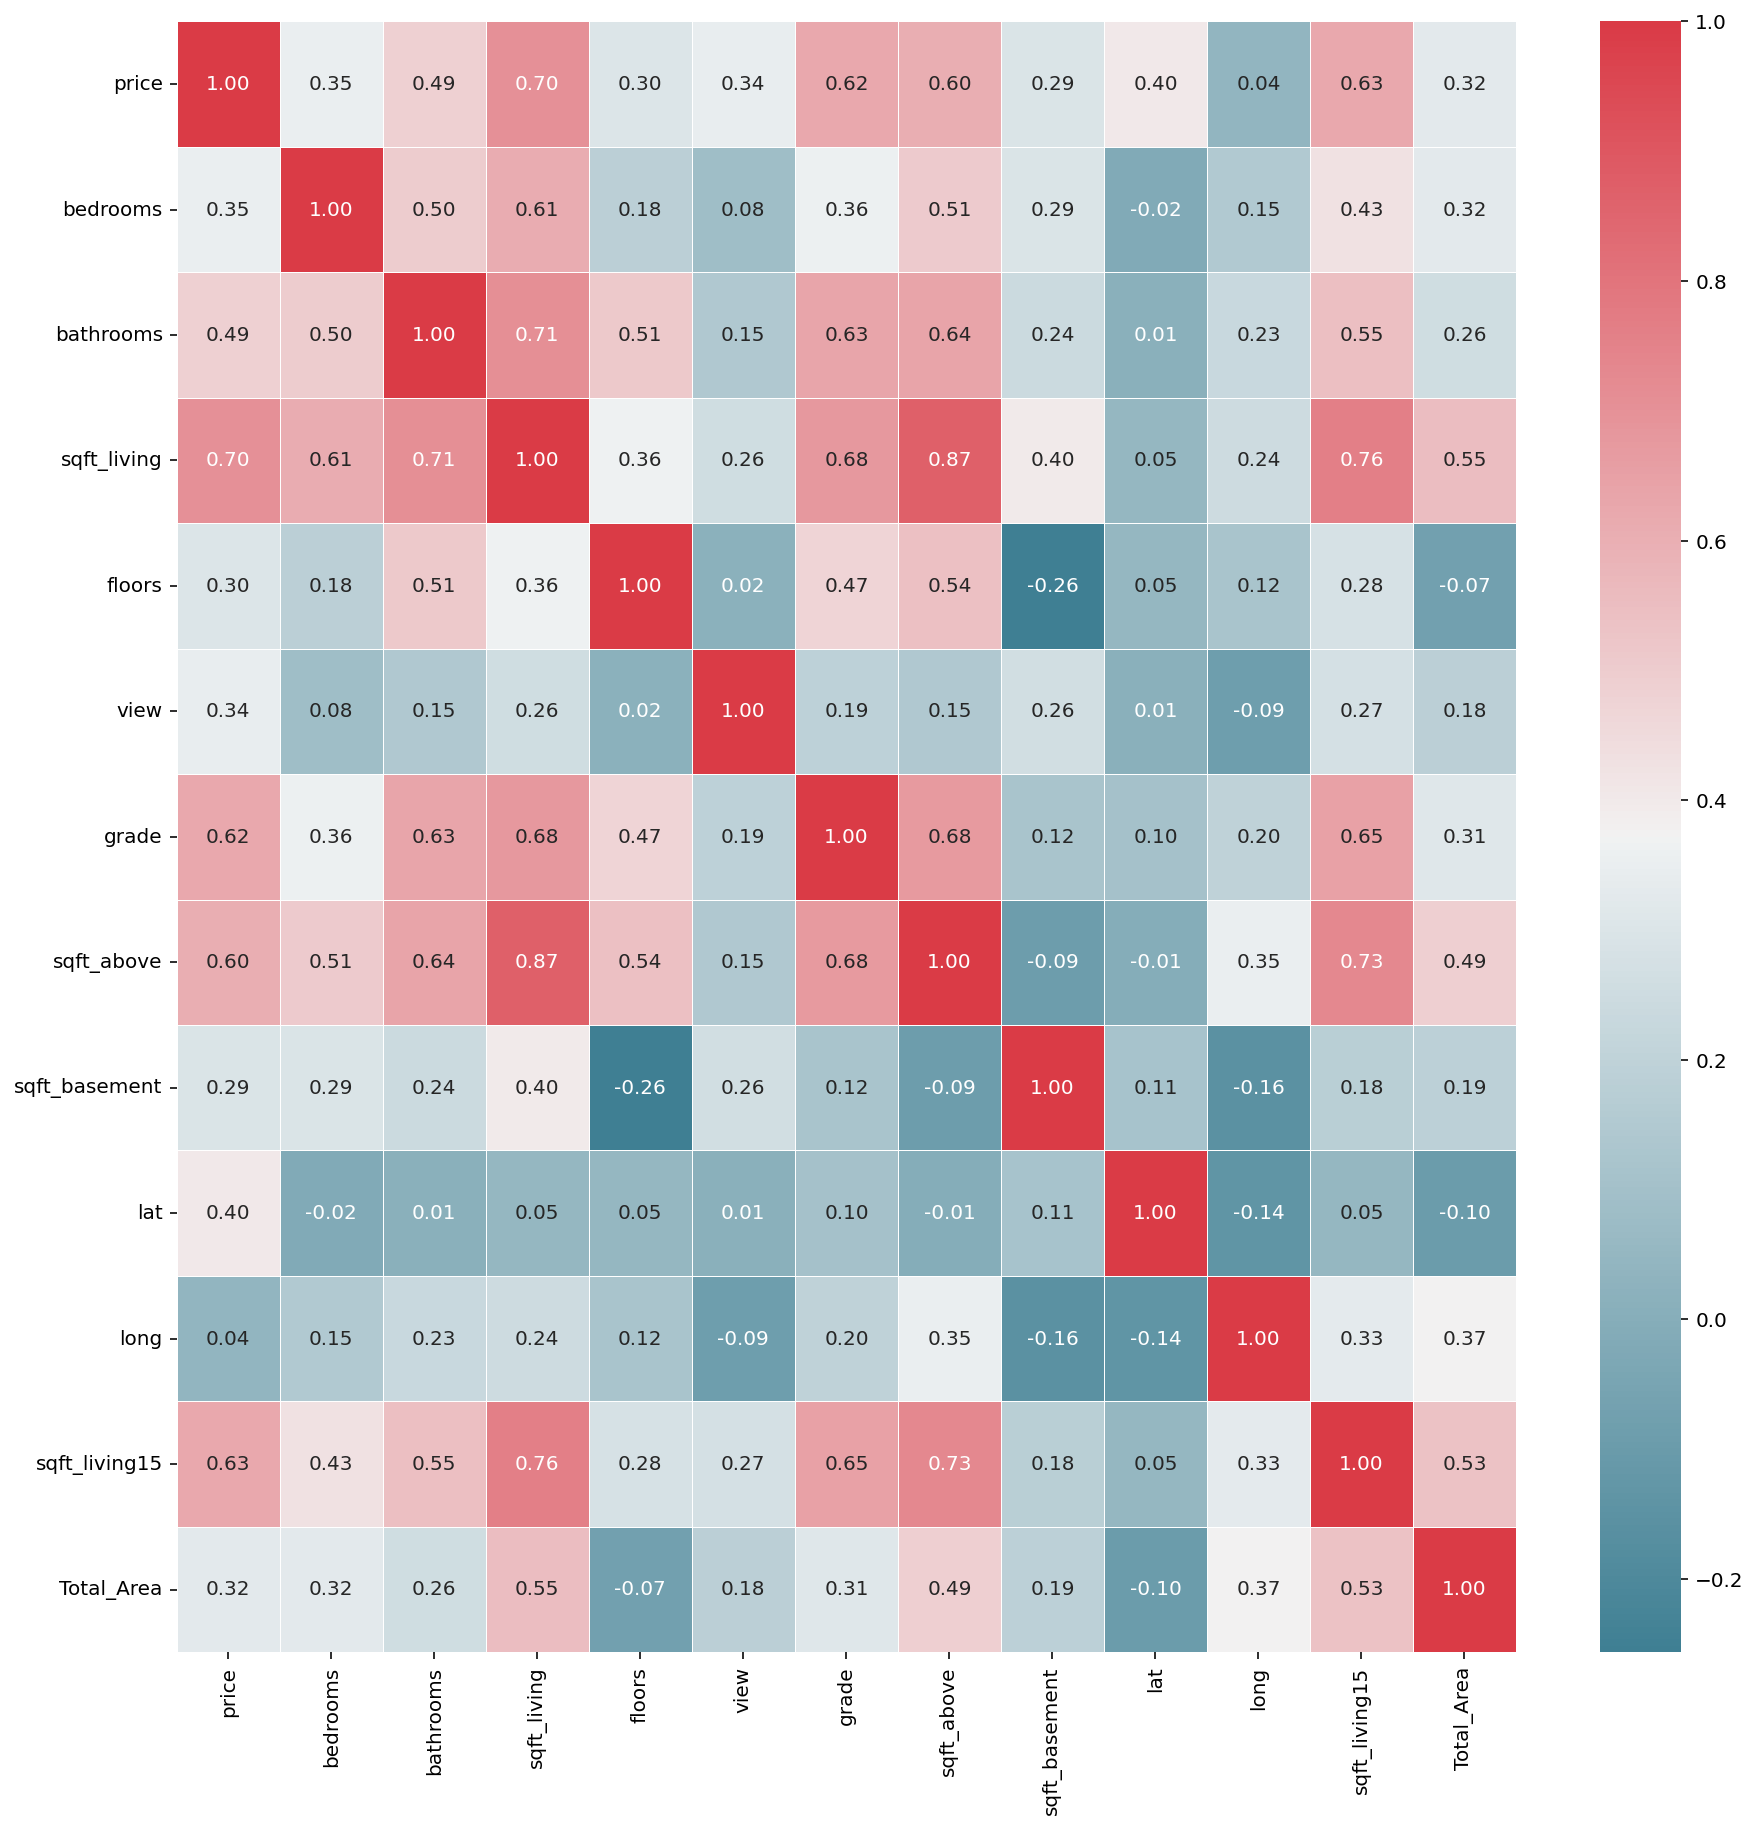

In [32]:
f, ax = plt.subplots(figsize=(15, 15))
colormap= sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df.corr(),annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap=colormap)
plt.show()

### 5. Data Analysis, Data Modelling

- Data Modeling is the most common way of breaking down the information objects and their relationship to different articles. Used to dissect the information prerequisites are expected for the business processes. The information models are made for the information to be put away in a data set.
- There are some steps that need to perform on the data such as data splitting, create model, fit the model, find the accuracy score, compare the models and find the best fit model and at the end find the meximum weight on the price prediction.

1. split the data in the two data sets one is training data and another is testing data
    - Training data: It's a set of data tests used to fit the boundaries of an AI model to prepare it as a visual cue. Preparing information is otherwise called preparing a dataset, learning set, and preparing sets. It's a fundamental part of each and every AI model and assists them with making precise forecasts or playing out an ideal undertaking.
    - Testing Data: "Data made or chose to fulfil the execution preconditions and contributions to execute at least one experiment." There is a great deal of consideration for testing techniques like security testing, execution testing or relapse testing. Testing spry and test mechanization are additionally hotly debated issues nowadays. Moreover, we remove the price in the testing data because we have to predict the price using differet algorithms.

In [34]:
# Splitting & scaling the data

X = df.drop("price", axis=1)
y = df["price"]

In [35]:
# As id and date columns are not important to predict price so we are discarding it for finding correlation
features = df.iloc[:,3:].columns.tolist()
target = df.iloc[:,2].name

In [36]:
# Finding Correlation of price woth other variables to see how many variables are strongly correlated with price
from scipy.stats.stats import pearsonr
correlations = {}
for f in features:
    data_temp = df[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [37]:
# Printing all the correlated features value with respect to price which is target variable
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

Value
sqft_living vs bathrooms    0.708894
sqft_above vs bathrooms     0.638998
grade vs bathrooms          0.633342
sqft_living15 vs bathrooms  0.547628
floors vs bathrooms         0.511457
Total_Area vs bathrooms     0.258087
sqft_basement vs bathrooms  0.243083
long vs bathrooms           0.231204
view vs bathrooms           0.145658
lat vs bathrooms            0.011749

- Here we use Linear regression, Random Forest Classifier, Random Forest Regressor, Gradient Boosting Regressor, AdaBoost Regressor, Decision Tree Regressor and, in Rapid Miner we use the K-NN, Naive Bayes, Decision Tree form more understaing.

1. Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Simple Model
Mean Squared Error (MSE)  175657.72
R-squared (training)  0.488
R-squared (testing)  0.505
Intercept:  [80690.71744817]
Coefficient: [[209.12095471]]


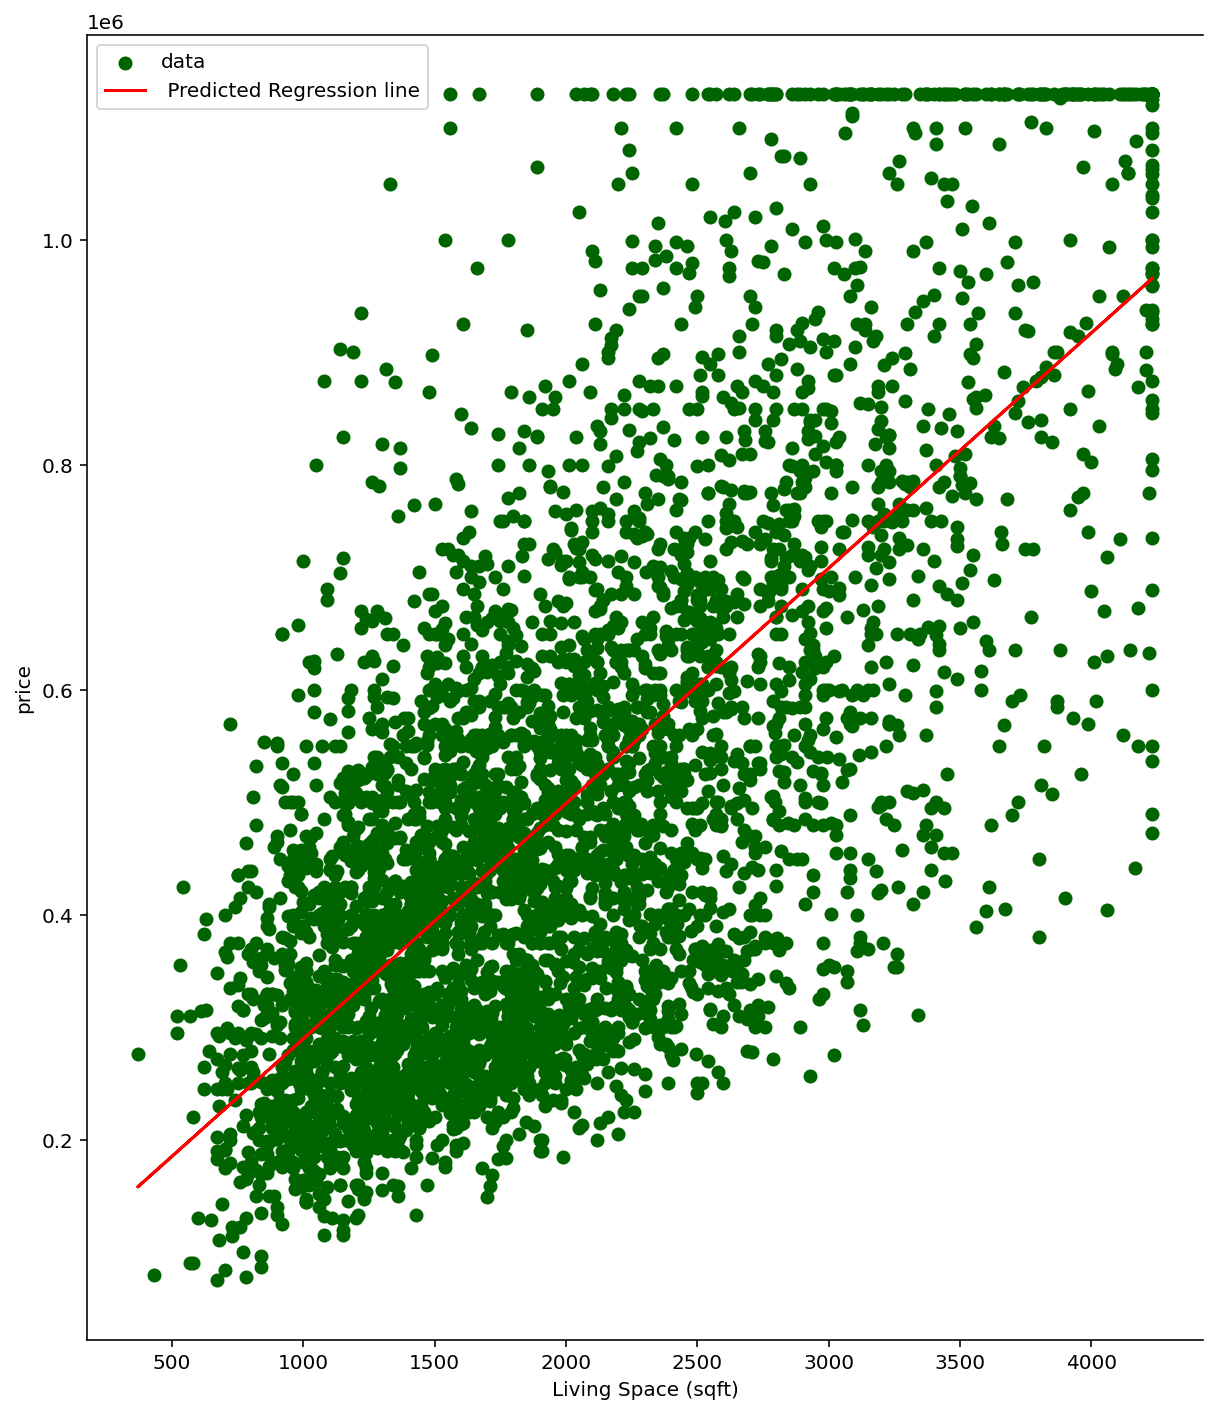

In [38]:
from sklearn import linear_model

#train_data, test_data = train_test_split(df_check, train_size =0.8, random_state = 3)
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)

reg = linear_model.LinearRegression()
x_train = np.array(train_data['sqft_living']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1, 1)
reg.fit(x_train, y_train)
#evaluate simple model
x_test = np.array(test_data['sqft_living']).reshape(-1, 1)
y_test = np.array(test_data['price']).reshape(-1, 1)
pred = reg.predict(x_test)
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_train, y_train), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

_, ax = plt.subplots(figsize= (10, 12))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [39]:
df_train=df.copy()
df_train.rename(columns ={'price': 'SalePrice'}, inplace =True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
print(X.shape,y.shape)

(21613, 12) (21613,)


In [42]:
# Training a classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import explained_variance_score
forest = RandomForestClassifier(max_depth=2)
start = time()
forest.fit(X_train,y_train)
end=time()
train_time_Rforest=end-start
random=forest.score(X_test,y_test)
predictions = forest.predict(X_test)
exp_Rforest = explained_variance_score(predictions,y_test)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from time import time
rand_regr = RandomForestRegressor(n_estimators=400,random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end=time()
train_time_rand=end-start
rforest=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions,y_test)

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
end=time()
train_time_g=end-start
gradient=est.score(X_test,y_test)

pred = est.predict(X_test)
exp_est = explained_variance_score(pred,y_test)

In [45]:
from sklearn.ensemble import AdaBoostRegressor
start = time()
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
end=time()
train_time_ada=end-start
pred=ada.predict(X_test)
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
exp_ada = explained_variance_score(predict,y_test)

In [46]:
from sklearn.tree  import DecisionTreeRegressor
decision=DecisionTreeRegressor()
start = time()
decision.fit(X_train, y_train)
end=time()
train_time_dec=end-start
decc=decision.score(X_test,y_test)
decpredict = decision.predict(X_test)
exp_dec = explained_variance_score(decpredict,y_test)

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

dtr.score(X_test,y_test)

0.7585682989483324

In [48]:
# Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest','Decision Tree'],
    'Score': [gradient,adab,random,decc],
     'Variance Score': [exp_est,exp_ada,exp_rand,exp_dec]})
    
models_cross.sort_values(by='Score', ascending=False)

Model     Score  Variance Score
0  Gradient Boosting  0.894173        0.881613
1           AdaBoost  0.760414        0.626961
3      Decision Tree  0.751101        0.759594
2      Random Forest  0.049815        0.877690

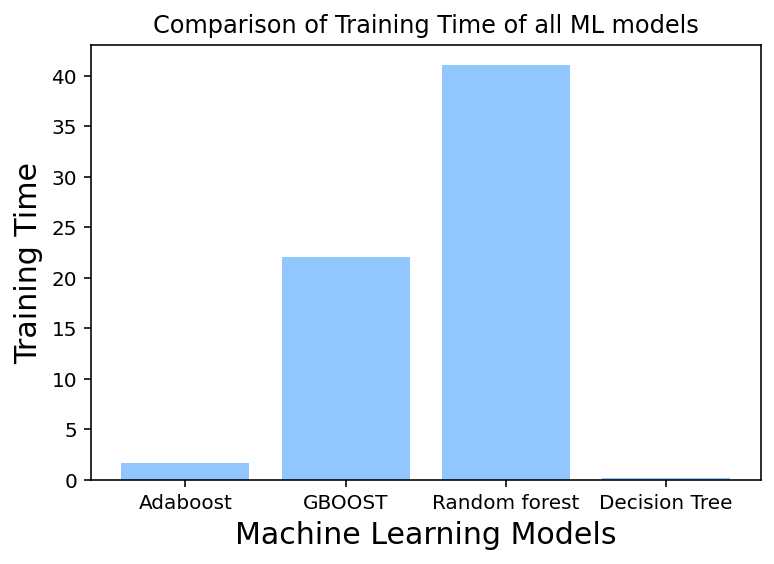

In [49]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Adaboost', 'GBOOST', 'Random forest', 'Decision Tree']
Train_Time = [
    train_time_ada,
    train_time_g,
    train_time_rand,
    train_time_dec
    
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

# 6. Conclusion

### 

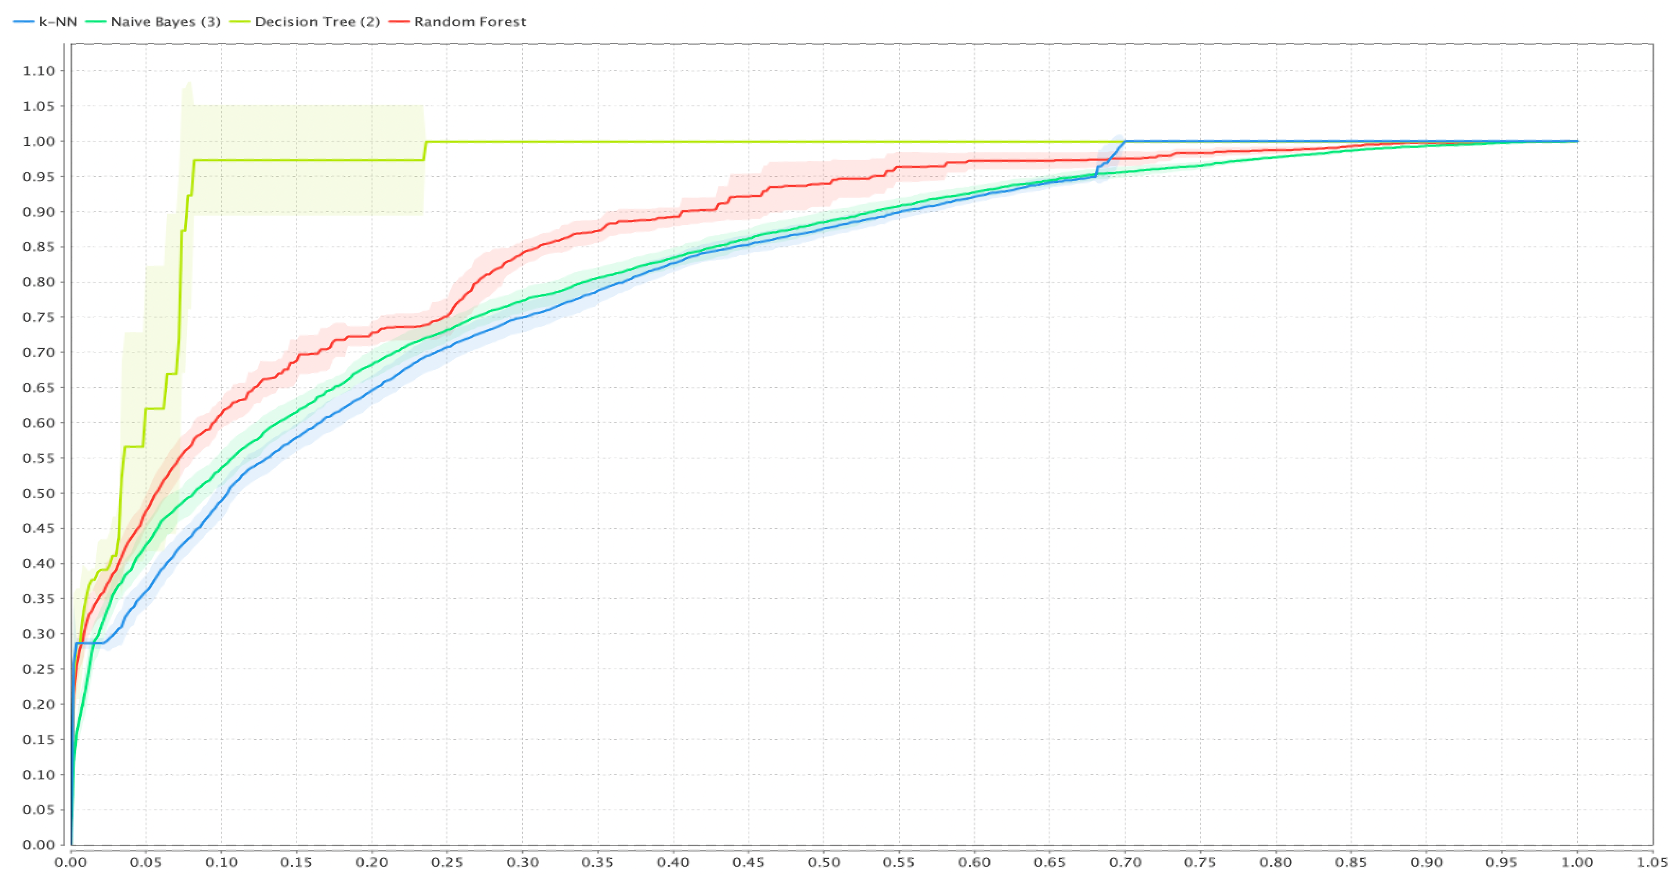

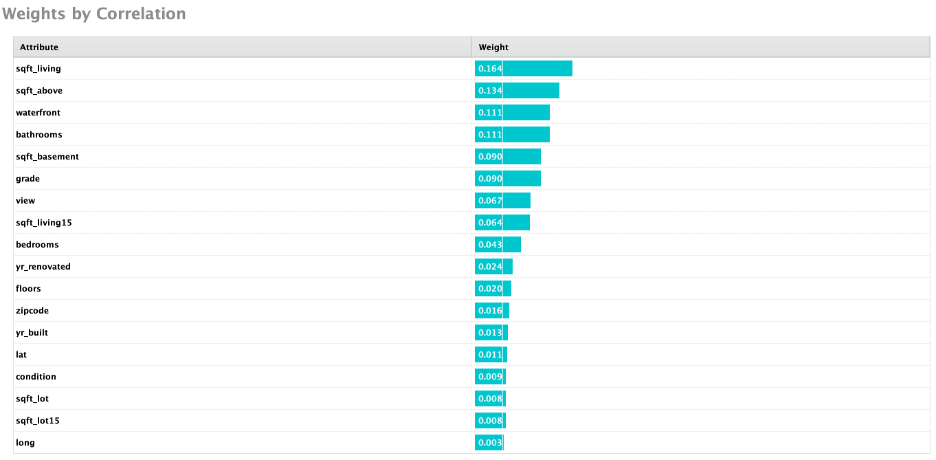